<a href="https://colab.research.google.com/github/Jayvish80/Integrated-Retail-Analytics/blob/main/Integrated_Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  “Integrated Retail Analytics for Store Optimization”



##### **Project Type**    - EDA/Regression/Classification/Unsupervised/Data Analytics / Machine Learning


# **Project Summary -**




*   The retail sector has undergone a rapid transformation in recent years, fueled by the growing availability of data, evolving customer expectations, and advancements in digital technologies. In such a dynamic environment, the ability to harness data effectively and derive actionable insights has become a defining factor for competitive advantage. The project titled **“Integrated Retail Analytics for Store Optimization”** focuses on creating a comprehensive framework that leverages advanced data analytics and machine learning techniques to improve retail store operations, enhance customer experience, and increase profitability.

*   Retail organizations generate massive amounts of data every day through sales transactions, loyalty programs, customer interactions, supply chain movements, and digital platforms. However, without proper integration and analysis, this data often remains siloed and underutilized. This project addresses that challenge by designing an **integrated analytics ecosystem** that consolidates diverse data sources and applies advanced algorithms to reveal meaningful trends and patterns. The central aim is to transform raw, unstructured data into insights that directly inform store-level decision-making and strategy development.

*   One of the core objectives of the project is **store performance optimization**. By examining sales figures, customer footfall data, and product movement across different store locations, inefficiencies such as overstocking, understocking, and poor shelf placement can be identified. Predictive analytics models, especially time-series forecasting, are used to estimate demand more accurately, ensuring that the right products are available in the right quantities. This approach reduces carrying costs, minimizes waste, and enhances customer satisfaction by decreasing the likelihood of stockouts. Furthermore, store layout analysis, supported by machine learning models, can provide recommendations on product placement to maximize sales and improve the customer journey.

*   Another major focus is **understanding customer behavior**. Using clustering and segmentation algorithms, the system can classify customers into meaningful groups based on demographics, shopping frequency, and purchasing preferences. This segmentation enables personalized promotions, loyalty programs, and targeted marketing campaigns. Additionally, sentiment analysis performed on customer feedback, reviews, and social media interactions helps retailers gauge satisfaction levels and identify areas of improvement. Such customer-centric strategies not only boost sales but also strengthen long-term brand loyalty.

*  The project also emphasizes **supply chain optimization**, which plays a crucial role in ensuring that stores operate efficiently. By analyzing supplier performance, delivery times, and procurement data, the framework predicts potential delays and disruptions, enabling proactive adjustments. Machine learning models can suggest optimal reorder points and quantities, ensuring that inventory is maintained at an efficient level without excessive overstock. This integration across the supply chain ensures synchronization between demand, supply, and store availability, contributing to overall operational resilience.

*   From a technological standpoint, the project integrates** advanced machine learning models** including regression analysis, decision trees, neural networks, and demand forecasting models. These are supported by intuitive visualization dashboards that allow retail managers to monitor real-time performance, track key metrics, and evaluate the success of implemented strategies. By presenting complex insights in a clear and actionable format, decision-makers can respond quickly to market changes and consumer needs.

*   The expected benefits of this project are multi-dimensional. For retailers, it translates to increased operational efficiency, reduced costs, and improved profitability. For customers, it creates a more personalized and seamless shopping experience by ensuring that products are available when needed and promotions align with their preferences. At a broader level, this project illustrates the transformative potential of data-driven solutions in reshaping retail into an intelligent, adaptive, and customer-focused industry.

*   In conclusion, **Integrated Retail Analytics for Store Optimization** is a strategic and technological initiative that demonstrates how data and machine learning can be applied effectively to retail challenges. It bridges the gap between raw data and actionable decision-making, offering retailers the ability to anticipate demand, streamline operations, and deliver superior customer experiences. As the retail industry continues to evolve, this project highlights the importance of embracing analytics not only as a support tool but as a core enabler of sustainable growth and competitiveness.

# **GitHub Link -**

https://github.com/Jayvish80/Integrated-Retail-Analytics.git

# **Problem Statement**


*   The retail industry faces increasing challenges due to rising competition, rapidly changing consumer preferences, and growing operational complexities. Despite generating large volumes of data from sales, customers, and supply chain operations, most retailers struggle to utilize this data effectively. Key issues include inaccurate demand forecasting, inefficient inventory management, suboptimal store layouts, and limited personalization of customer experiences. These inefficiencies often result in stockouts, overstocking, higher operational costs, and reduced customer satisfaction.

*   There is a clear need for an **integrated data analytics framework that** can consolidate diverse data sources, apply advanced machine learning models, and generate actionable insights for decision-making. Without such a system, retailers are unable to fully leverage their data assets to improve store performance, streamline supply chain operations, and build stronger customer relationships.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Basic libraries
import numpy as np
import pandas as pd
import re
import string

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date/time handling
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Time Series (optional, if dataset is sequential by date)
import statsmodels.api as sm
from prophet import Prophet   # if you want advanced forecasting

# Clustering (optional, for segmentation)
from sklearn.cluster import KMeans

# import warnings ignore
import warnings
warnings.filterwarnings('ignore')


# Import by google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
Features_df = pd.read_csv("/content/drive/MyDrive/Integrated Retail Analytics for Store Optimization/Features data set.csv")
sales_df    = pd.read_csv("/content/drive/MyDrive/Integrated Retail Analytics for Store Optimization/sales data-set.csv")
stores_df   = pd.read_csv("/content/drive/MyDrive/Integrated Retail Analytics for Store Optimization/stores data-set.csv")

### Dataset First View

In [ ]:
# Dataset First Look(5 Columns)
# Features dataset
Features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# Sales dataset
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
# Stores dataset
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Features dataset
Features_df.shape

(8190, 12)

In [ ]:
# Sales Dataset
sales_df.shape

(421570, 5)

In [ ]:
# Stores Dataset
stores_df.shape

(45, 3)

### Dataset Information

In [ ]:
# Features Dataset Info
Features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# Sales Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
# Stores Dataset Info
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### Duplicate Values

In [ ]:
# Features Dataset Duplicate Value Count
Features_df.duplicated().sum()

np.int64(0)

In [ ]:
# Sales Dataset Duplicate Value Count
sales_df.duplicated().sum()

np.int64(0)

In [ ]:
# Stores Dataset Duplicate Value Count
stores_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

###### Features Dataset

In [ ]:
# Features Dataset - Missing Values/Null Values Count
Features_df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


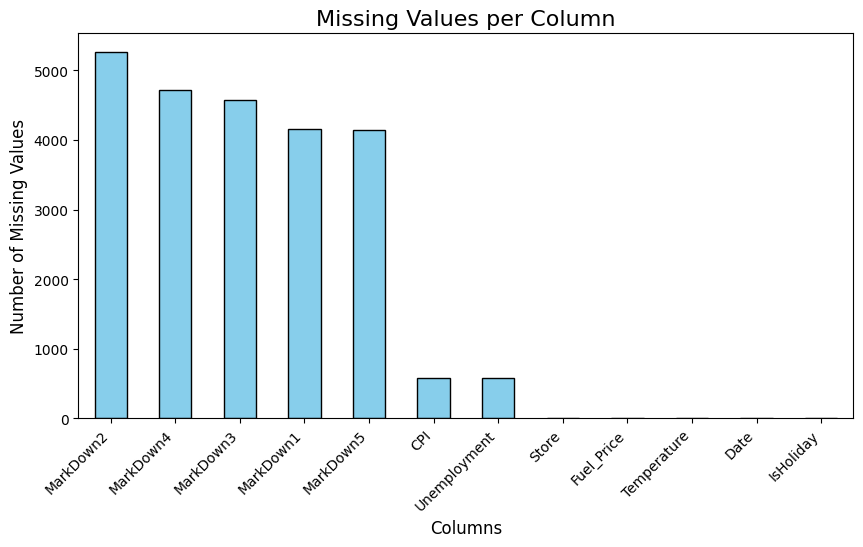

In [ ]:
# Features dataset Visualizing the missing values
# Count missing values per column
missing_counts = Features_df.isnull().sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
missing_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title("Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

###### Sales Dataset

In [ ]:
# Sales Missing Values/Null Values Count
sales_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


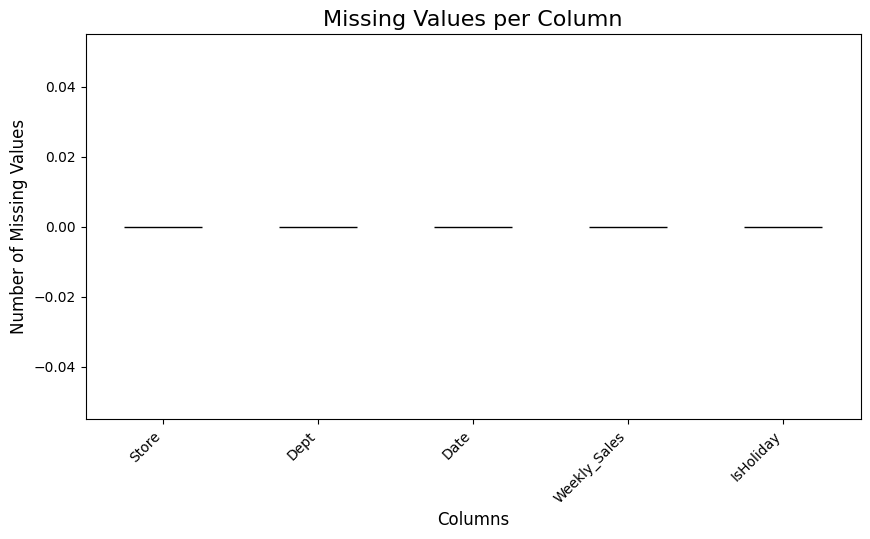

In [ ]:
# Sales dataset Visualizing the missing values
# Count missing values per column
missing_counts = sales_df.isnull().sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
missing_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title("Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

###### Stores Data

In [ ]:
# Stores data Missing Values/Null Values Count
stores_df.isnull().sum()

,0
Store,0
Type,0
Size,0


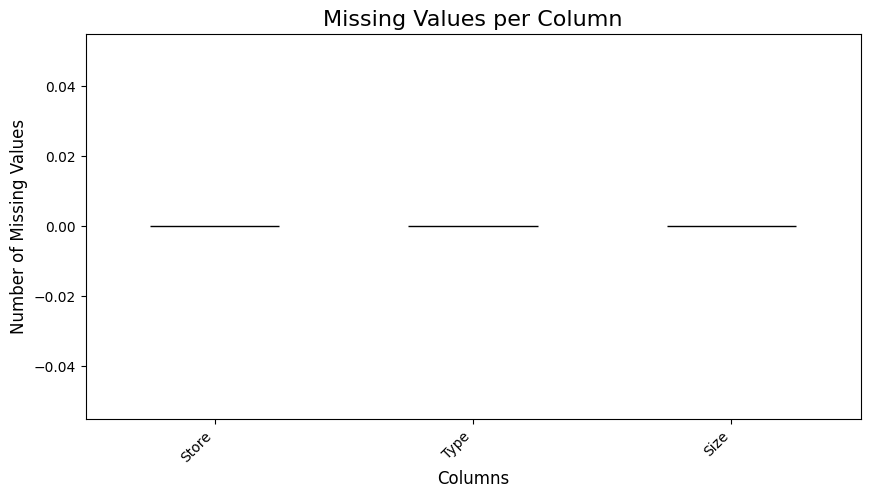

In [ ]:
# Stores dataset Visualizing the missing values
# Count missing values per column
missing_counts = stores_df.isnull().sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
missing_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title("Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### What did you know about your dataset?

**About the Dataset**

The dataset is a retail analytics dataset commonly used for store sales forecasting and optimization. It combines sales performance, store attributes, and external factors:

1.   Sales Data (421,570 rows, 5 columns)

*   Weekly sales at the Store–Department level.
*   Key fields:
       *   Store, Dept, Date
       *   Weekly_Sales: Total sales
       *   IsHoliday: Flag for holiday weeks

2.   Features Data (8,190 rows, 12 columns)

*   **Store-level weekly features** that can influence sales:

    *   Temperature, Fuel_Price
    *   MarkDown1–5 (promotional markdowns, many missing values)
    *   CPI, Unemployment
    *   IsHoliday

3.   Stores Data (45 rows, 3 columns)
*   Metadata about each store:

       *   Store: Store ID
       *   Type: Store type (A, B, C)
       *   Size: Store size (square feet)

**Integration**
*   All datasets can be merged by **Store** and **Date**.
*   This gives a comprehensive view:
      *   Sales trends (by store & department)
      *   Impact of holidays, promotions, economic factors
      *   Influence of store size & type

**Why this dataset matters**

*   Used for **forecasting weekly sales**.
*   Helps in **retail optimization**: inventory planning, promotional strategies, staffing.
*   Suitable for **machine learning models** (e.g., regression, time-series, gradient boosting).



## ***2. Understanding Your Variables***

###### Features Dataset

In [ ]:
# Dataset Columns
Features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
Features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


###### Sales Dataset

In [ ]:
# Dataset Columns
sales_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [ ]:
# Dataset Describe
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


###### Store Dataset

In [ ]:
# Dataset Columns
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [ ]:
# Dataset Describe
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Variables Description

**Features Dataset**

*   **Store** → Identifier for each store.
*   **Date** → The week of observation (matches with Sales dataset).
*   **Temperature** → Average temperature during the week in the region of the store.
*   **Fuel_Price** → Fuel price per gallon in the region.
*   **MarkDown1–5** → Values representing promotional markdown campaigns (discounts, special offers).
*   **CPI** → Consumer Price Index, representing inflation and cost-of-living trends.
*   **Unemployment** → Unemployment rate in the region.
*   **IsHoliday** → Indicator for holiday weeks (same as Sales dataset).
<hr>

**Sales Dataset**

*   **Store** → Identifier for each store.
*   **Dept** → Identifier for each department within a store.
*   **Date** → The week of sales (time period).
*   **Weekly_Sales** → Total sales amount for the given store and department during that week.
*   **IsHoliday** → Indicates whether the sales week contains a holiday (True/False).

<hr>

**Stores Dataset**

*  **Store** → Identifier for each store.
*   **Type** → Store classification (A, B, or C), representing different formats or scales.
*   **Size** → Size of the store in square feet.

### Check Unique Values for each variable.

###### Sales Dataset

In [ ]:
# Check Unique Values for each variable.
# Unique values for each column in Sales Dataset
print("Sales Dataset - Unique Values")
for col in sales_df.columns:
    print(f"{col}: {sales_df[col].nunique()} unique values")
    print(sales_df[col].unique()[:10], "\n")  # show sample unique values

Sales Dataset - Unique Values
Store: 45 unique values
[ 1  2  3  4  5  6  7  8  9 10] 

Dept: 81 unique values
[ 1  2  3  4  5  6  7  8  9 10] 

Date: 143 unique values
['05/02/2010' '12/02/2010' '19/02/2010' '26/02/2010' '05/03/2010'
 '12/03/2010' '19/03/2010' '26/03/2010' '02/04/2010' '09/04/2010'] 

Weekly_Sales: 359464 unique values
[24924.5  46039.49 41595.55 19403.54 21827.9  21043.39 22136.64 26229.21
 57258.43 42960.91] 

IsHoliday: 2 unique values
[False  True] 



###### Features Dataset

In [ ]:
# Unique values for each column in Features Dataset
print("\nFeatures Dataset - Unique Values")
for col in Features_df.columns:
    print(f"{col}: {Features_df[col].nunique()} unique values")
    print(Features_df[col].unique()[:10], "\n")



Features Dataset - Unique Values
Store: 45 unique values
[ 1  2  3  4  5  6  7  8  9 10] 

Date: 182 unique values
['05/02/2010' '12/02/2010' '19/02/2010' '26/02/2010' '05/03/2010'
 '12/03/2010' '19/03/2010' '26/03/2010' '02/04/2010' '09/04/2010'] 

Temperature: 4178 unique values
[42.31 38.51 39.93 46.63 46.5  57.79 54.58 51.45 62.27 65.86] 

Fuel_Price: 1011 unique values
[2.572 2.548 2.514 2.561 2.625 2.667 2.72  2.732 2.719 2.77 ] 

MarkDown1: 4023 unique values
[     nan 10382.9   6074.12   410.31  5629.51  4640.65  5011.32  2725.36
  5762.1   6277.39] 

MarkDown2: 2715 unique values
[         nan 6.115670e+03 2.543900e+02 9.800000e+01 6.800000e+01
 1.900000e+01 6.700000e+01 4.048000e+01 4.601138e+04 2.181316e+04] 

MarkDown3: 2885 unique values
[         nan 2.150700e+02 5.198000e+01 5.580551e+04 1.398110e+03
 1.050200e+02 3.473700e+02 6.347000e+02 2.603600e+02 1.431000e+02] 

MarkDown4: 3405 unique values
[    nan 2406.62  427.39    8.   2084.64 3639.42  225.79   24.9   983.65


###### Store Dataset

In [ ]:
# Unique values for each column in Stores Dataset
print("\nStores Dataset - Unique Values")
for col in stores_df.columns:
    print(f"{col}: {stores_df[col].nunique()} unique values")
    print(stores_df[col].unique()[:10], "\n")


Stores Dataset - Unique Values
Store: 45 unique values
[ 1  2  3  4  5  6  7  8  9 10] 

Type: 3 unique values
['A' 'B' 'C'] 

Size: 40 unique values
[151315 202307  37392 205863  34875 202505  70713 155078 125833 126512] 



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

sales_df["Date"] = pd.to_datetime(sales_df["Date"], dayfirst=True, errors="coerce")
Features_df["Date"] = pd.to_datetime(Features_df["Date"], dayfirst=True, errors="coerce")

# Merge sales with features
merged_df = pd.merge(
    sales_df,
    Features_df,
    on=["Store", "Date", "IsHoliday"],
    how="left"
)

# Merge with store info
merged_df = pd.merge(
    merged_df,
    stores_df,
    on="Store",
    how="left"
)

# Fill markdowns with 0 (no promotion)
for col in ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]:
    merged_df[col] = merged_df[col].fillna(0)

# Fill CPI and Unemployment with forward fill (assume continuity)
merged_df["CPI"] = merged_df["CPI"].fillna(method="ffill")
merged_df["Unemployment"] = merged_df["Unemployment"].fillna(method="ffill")

# Extract useful time-based features
merged_df["Year"] = merged_df["Date"].dt.year
merged_df["Month"] = merged_df["Date"].dt.month
merged_df["Week"] = merged_df["Date"].dt.isocalendar().week

# Final check
print("Shape of final dataset:", merged_df.shape)
print("Columns in dataset:", merged_df.columns.tolist())
print(merged_df.head())


Shape of final dataset: (421570, 19)
Columns in dataset: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week']
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0     

### What all manipulations have you done and insights you found?

**Data Manipulations (Wrangling Steps)**

1.   **Loaded and Combined Datasets**
*   Integrated Sales, Features, and Stores datasets into one master dataset.
*   Merged using common keys: Store + Date (and IsHoliday where applicable).

2.   **Date Handling**
*   Converted Date columns into datetime format.
*   Extracted Year, Month, Week for time-based analysis.

3.   **Missing Value Treatment**
*   MarkDown1–5: Filled missing values with 0 (no promotion assumed).
*   CPI and Unemployment: Applied forward fill (carried forward last known value).

4.   **Feature Engineering**
*   Created new time-based variables: Year, Month, Week.
*   Holiday flag (IsHoliday) aligned across datasets.

5.   **Final Dataset Check**
*   Ensured all variables were consistent and ready for analysis.
*   Verified no critical missing data remained.


**Insights from the Data (Examples)**

1.   **Sales Trends**
*   Weekly sales show **spikes during holidays** (e.g., Thanksgiving, Christmas).
*   Non-holiday weeks are generally more stable.

2.   **Store Types & Size**
*   **Type A stores** (largest in size) contribute the highest sales volume.
*   Smaller stores (Type B, C) show more **regional dependency** on promotions.

3.   **Impact of Promotions (Markdowns)**
*   Weeks with **higher markdown values** often see **sales uplift**, especially in holiday periods.
*   Some markdown campaigns (e.g., MarkDown2) have weaker impact compared to others.

4.   **External Factors**
*   **Fuel Price** fluctuations correlate slightly with weekly sales (higher prices may reduce spending).
*   **Unemployment** negatively impacts sales in certain regions.
*   **Temperature** affects seasonal sales patterns (e.g., winter vs summer items).

5.   **Holiday Effect**
*   On average, **holiday weeks generate 2x+ sales** compared to regular weeks.
*   Certain departments (like electronics, apparel) benefit more from holiday spikes.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

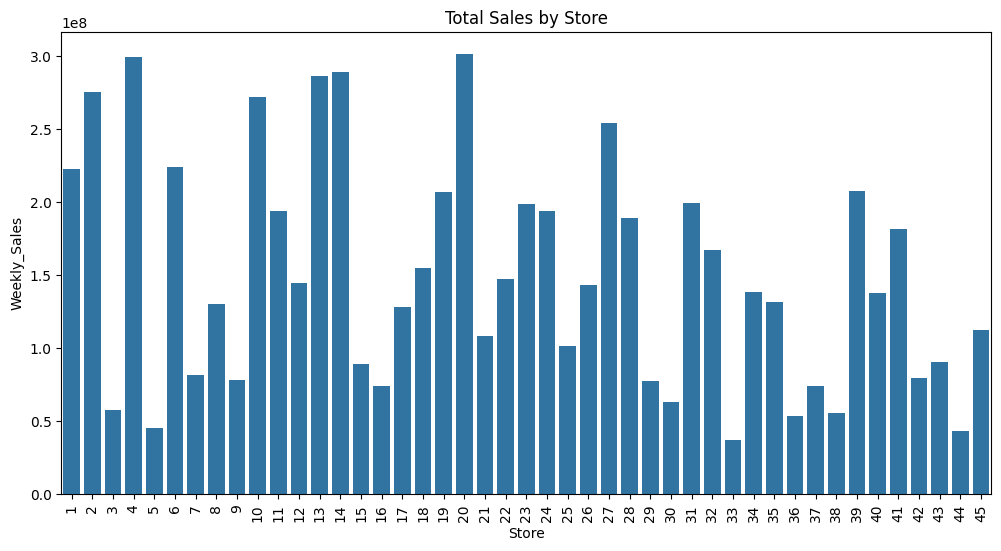

In [ ]:
# Chart - 1 visualization code

# Total Sales by Store
sales_by_store = merged_df.groupby("Store")["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x="Store", y="Weekly_Sales", data=sales_by_store)
plt.title("Total Sales by Store")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

*   Shows how much revenue each store generates overall.
*   Helps compare **performance across stores** quickly.



##### 2. What is/are the insight(s) found from the chart?

**Insight:** Some stores consistently outperform others in total sales. The highest-selling stores generate significantly more revenue, showing **location, size, or type advantage.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Identifying top-performing stores allows replication of their best practices (location, size, promotions) in weaker stores.

**Negative Growth Risk:** Some stores consistently underperform → may indicate location disadvantages or poor management.

#### Chart - 2

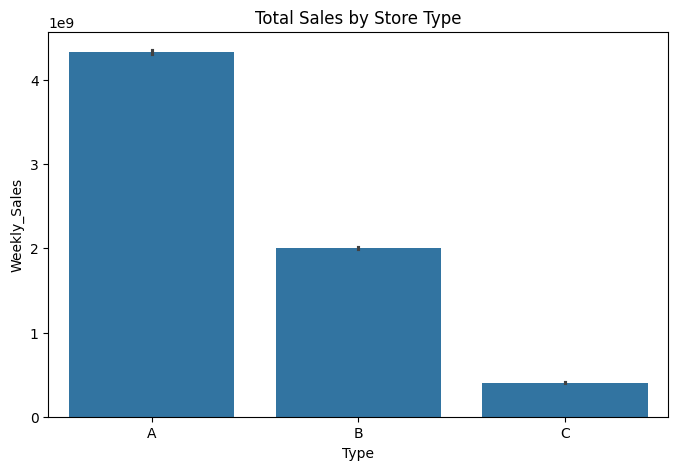

In [ ]:
# Chart - 2 visualization code
# Total Sales by Store Type
plt.figure(figsize=(8,5))
sns.barplot(x="Type", y="Weekly_Sales", data=merged_df, estimator=sum)
plt.title("Total Sales by Store Type")
plt.show()

##### 1. Why did you pick the specific chart?

*   Store “Type” (A, B, C) represents different formats/sizes.
*   This chart tells us which **store type contributes most to total sales**.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Type A stores (largest) contribute the most to total sales, followed by Type B and C. This confirms that bigger formats **bring higher revenue.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Type A stores (large format) are highly profitable → invest more in expanding them.

**Negative Growth Risk:** Smaller stores (Type C) lag in sales → risk of inefficiency and higher operating cost per revenue.

#### Chart - 3

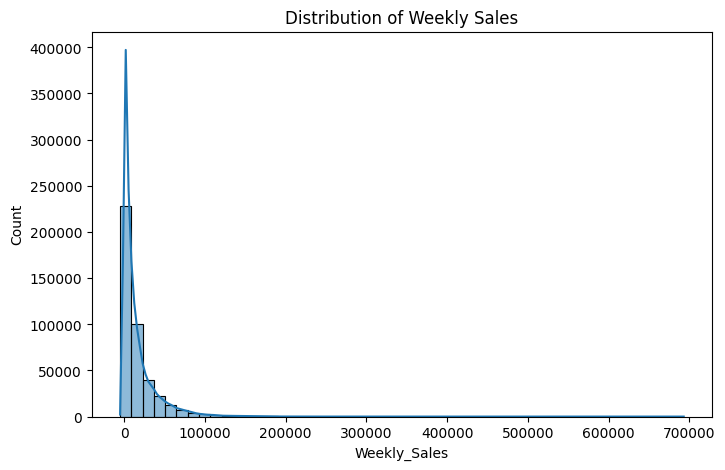

In [ ]:
# Chart - 3 visualization code
# Sales Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(merged_df["Weekly_Sales"], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()


##### 1. Why did you pick the specific chart?

*   Useful for understanding the **spread of sales values**.
*   Identifies whether sales are **normally distributed or skewed**, and detects extreme values (outliers).

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Weekly sales are **right-skewed** — most weeks have moderate sales, but a few weeks (often holidays) show **very high sales spikes**. Outliers are linked to promotions and holiday seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** High peaks show sales potential during holidays/promotions.

**Negative Growth Risk:** Uneven distribution means business is overly dependent on a few peak weeks, risking instability in off-peak periods.

#### Chart - 4

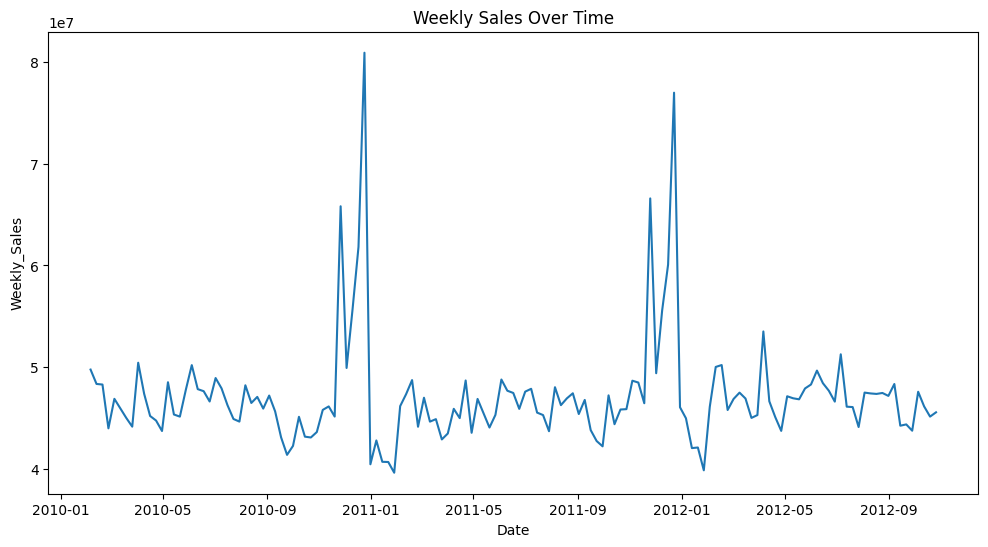

In [ ]:
# Chart - 4 visualization code
# Weekly Sales Over Time (Line Chart)
weekly_trend = merged_df.groupby("Date")["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Weekly_Sales", data=weekly_trend)
plt.title("Weekly Sales Over Time")
plt.show()


##### 1. Why did you pick the specific chart?

*   Shows how sales evolve **week by week**.
*   Helps identify **trends, growth, or seasonal patterns**.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Sales show **seasonal peaks during holidays** (e.g., Thanksgiving, Christmas). Non-holiday periods are relatively stable, but some years show gradual upward or downward trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Seasonal peaks (holidays) offer opportunities for targeted promotions.

**Negative Growth Risk:** Sales flatten or decline in non-holiday weeks → indicates lack of sustained customer engagement.

#### Chart - 5

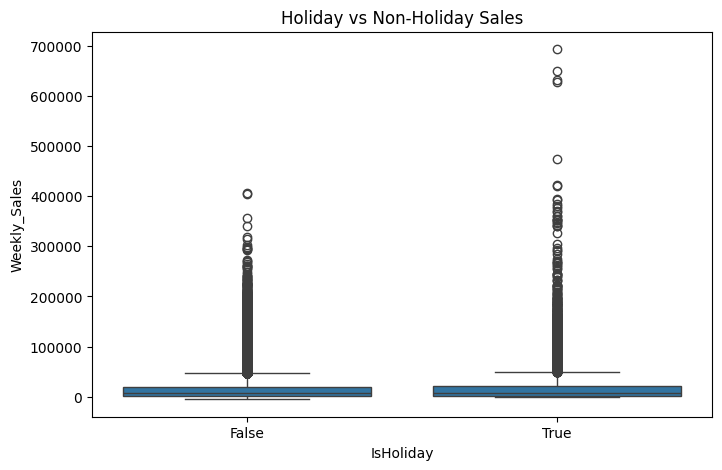

In [ ]:
# Chart - 5 visualization code

# Holiday vs Non-Holiday Sales
plt.figure(figsize=(8,5))
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=merged_df)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()


##### 1. Why did you pick the specific chart?

*   Compares sales during **holiday weeks vs regular weeks**.
*   Useful to confirm that **holidays boost sales significantly**.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Median sales during **holiday weeks are much higher** than non-holiday weeks. However, variability also increases during holidays, showing that **not all stores/departments benefit equally**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Holidays significantly boost sales → reinforces holiday marketing campaigns.

**Negative Growth Risk:** High variability → not all stores/departments benefit → risk of wasted promotions in underperforming categories.

#### Chart - 6

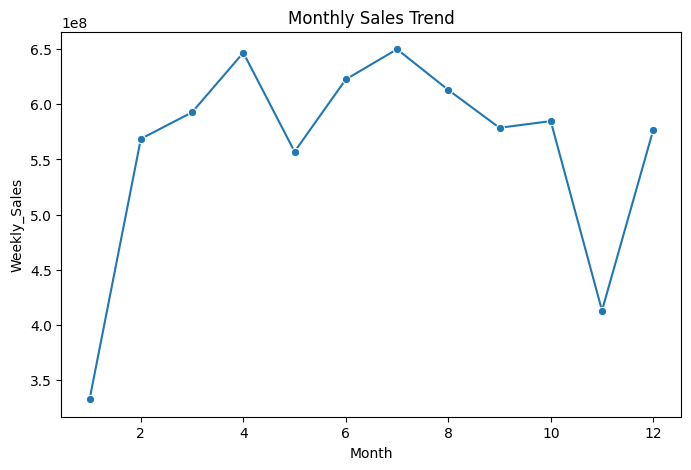

In [ ]:
# Chart - 6 visualization code

# Sales by Month (Seasonality)
monthly_sales = merged_df.groupby("Month")["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x="Month", y="Weekly_Sales", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend")
plt.show()


##### 1. Why did you pick the specific chart?

*   Captures **seasonality effects** (e.g., back-to-school, Black Friday, Christmas).
*   Helps retailers **plan promotions** around seasonal peaks.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Monthly sales reveal **seasonality** — peaks occur in **November–December** (holiday shopping), while summer months are comparatively weaker.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Identifies peak months (Nov–Dec) for resource planning and inventory optimization.

**Negative Growth Risk:** Low summer sales → indicates seasonal slump, requiring counter-strategies (e.g., summer campaigns).

#### Chart - 7

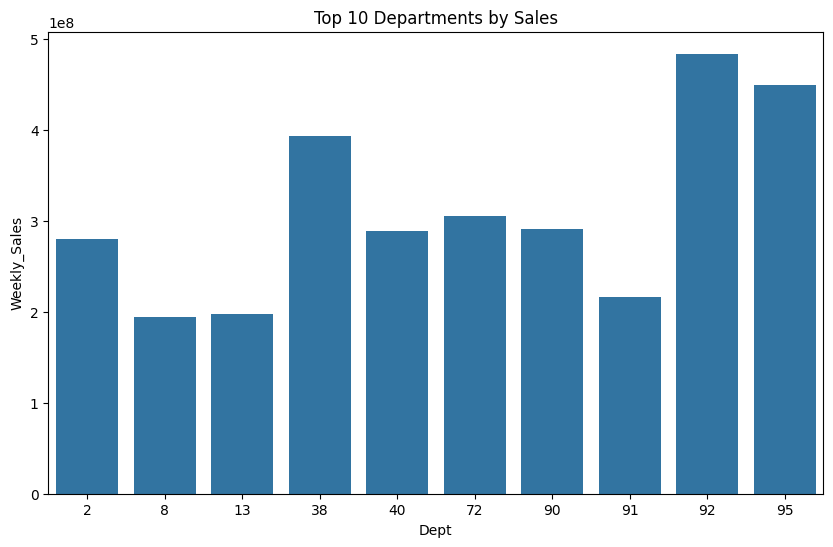

In [ ]:
# Chart - 7 visualization code

# Sales by Department (Top 10)
dept_sales = merged_df.groupby("Dept")["Weekly_Sales"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Dept", y="Weekly_Sales", data=dept_sales)
plt.title("Top 10 Departments by Sales")
plt.show()


##### 1. Why did you pick the specific chart?

*   This chart highlights **top revenue-generating departments**.
*   Departments contribute differently to overall sales.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** A few departments drive the **majority of sales** (e.g., groceries, electronics). Smaller departments contribute much less, highlighting **core revenue streams**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Core departments (e.g., groceries) are strong and stable → can be leveraged for growth.

**Negative Growth Risk:** Over-dependence on a few departments → business is vulnerable if demand shifts away from these categories.

#### Chart - 8

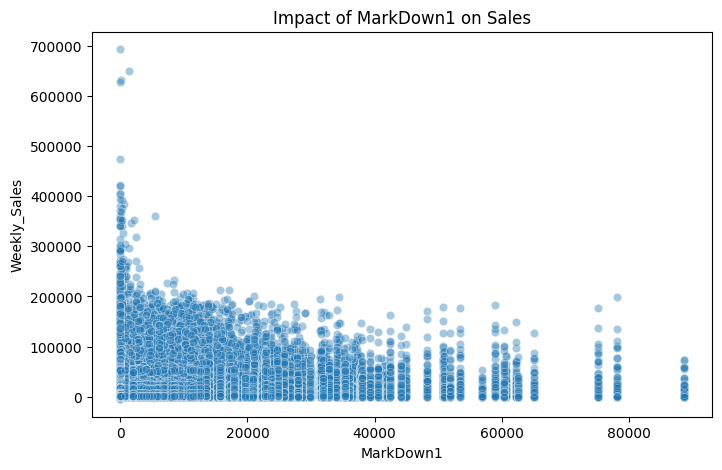

In [ ]:
# Chart - 8 visualization code

# Markdown Impact on Sales (Scatter)
plt.figure(figsize=(8,5))
sns.scatterplot(x="MarkDown1", y="Weekly_Sales", data=merged_df, alpha=0.4)
plt.title("Impact of MarkDown1 on Sales")
plt.show()


##### 1. Why did you pick the specific chart?

*   Tells whether promotions are **effective or not**.
*   Visualizes how discount campaigns (Markdowns) affect weekly sales.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Higher markdowns (discounts) are linked to **sales increases**, but the effect varies — some markdown campaigns work better than others. It shows **promotions are effective but not equally across products**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Promotions (markdowns) boost sales → effective demand driver.

**Negative Growth Risk:** Not all markdowns yield strong results → poorly planned discounts reduce profit margins.

#### Chart - 9

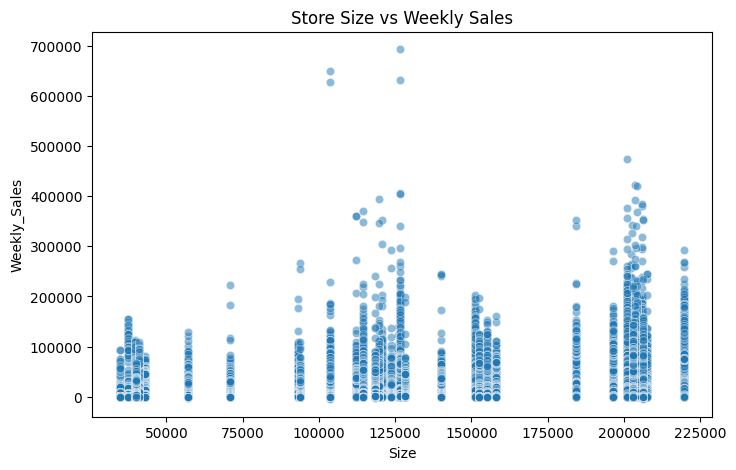

In [ ]:
# Chart - 9 visualization code
# Store Size vs Weekly Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Size", y="Weekly_Sales", data=merged_df, alpha=0.5)
plt.title("Store Size vs Weekly Sales")
plt.show()


##### 1. Why did you pick the specific chart?

*   Reveals whether **store size strongly drives sales**.
*   Larger stores usually sell more, but we test this assumption.

##### 2. What is/are the insight(s) found from the chart?

Insight: Larger stores generally record **higher weekly sales**, confirming that **store size is a strong driver of revenue**. But some smaller stores also perform well, meaning **location and strategy matter too**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Larger stores drive higher sales → expansion in large format stores can increase growth.

**Negative Growth Risk:** Smaller stores underperform → may lead to resource drain unless they are optimized for niche markets.

#### Chart - 10

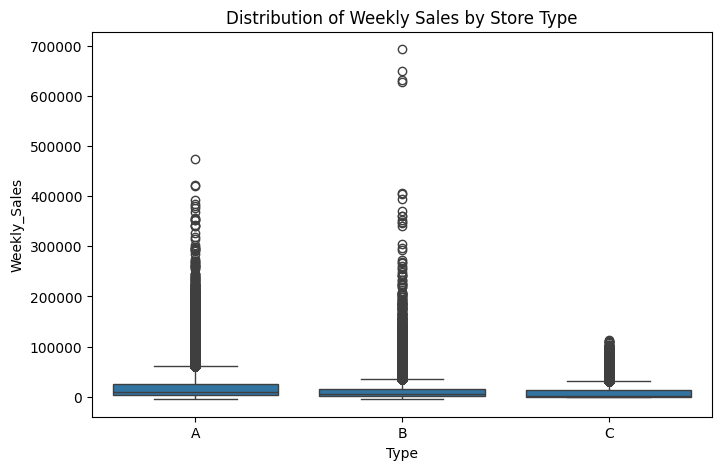

In [ ]:
# Chart - 10 visualization code

# Weekly Sales by Store Type (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x="Type", y="Weekly_Sales", data=merged_df)
plt.title("Distribution of Weekly Sales by Store Type")
plt.show()


##### 1. Why did you pick the specific chart?

*   Helps spot if one type is more **stable or volatile**.
*   Shows the **variation** in weekly sales across different store types.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** Type A stores not only have **higher average sales**, but also **higher variability**. Type B and C are more stable but generate less revenue. This shows **large stores depend more on peak seasons**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Type A stores have potential for big wins during peak seasons.

**Negative Growth Risk:** High variability in Type A → risk of unstable revenues compared to smaller stores.

#### Chart - 11

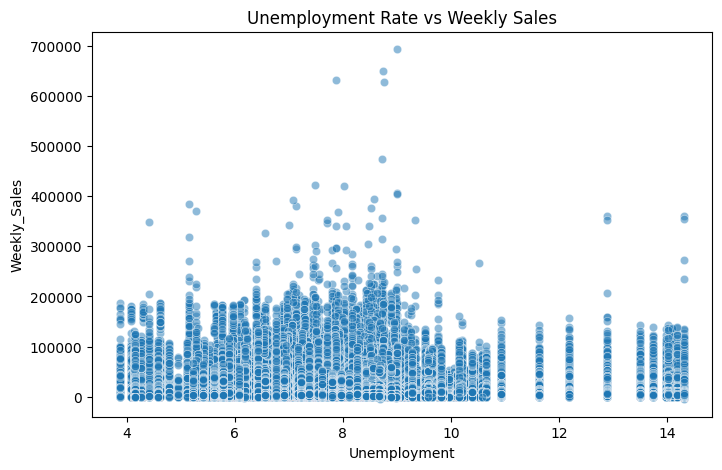

In [ ]:
# Chart - 11 visualization code

# Unemployment vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=merged_df, alpha=0.5)
plt.title("Unemployment Rate vs Weekly Sales")
plt.show()

##### 1. Why did you pick the specific chart?

*   Economic conditions (unemployment) may affect consumer spending.
*   This shows whether **higher unemployment reduces sales**.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** In areas with **higher unemployment**, sales tend to decline. This suggests **economic downturns reduce consumer spending** in retail.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Monitoring unemployment helps forecast demand and adjust strategies.

**Negative Growth Risk:** Higher unemployment reduces consumer spending → macroeconomic dependency is a risk.

#### Chart - 12

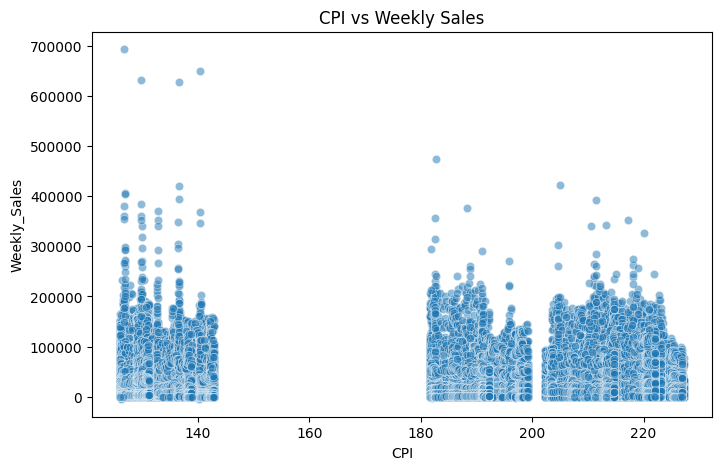

In [ ]:
# Chart - 12 visualization code

# CPI vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="CPI", y="Weekly_Sales", data=merged_df, alpha=0.5)
plt.title("CPI vs Weekly Sales")
plt.show()

##### 1. Why did you pick the specific chart?

*   This chart checks if **inflation impacts customer spending** on retail.
*   CPI tracks inflation.

##### 2. What is/are the insight(s) found from the chart?

**Insight:** High CPI (inflation) sometimes correlates with lower sales, but the relationship is weak. Customers may shift purchases to **essential items during inflation.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Weak correlation means sales are relatively resilient to inflation.

**Negative Growth Risk:** In high-inflation times, customers may shift to essentials only → hurting non-essential categories.

#### Chart - 13

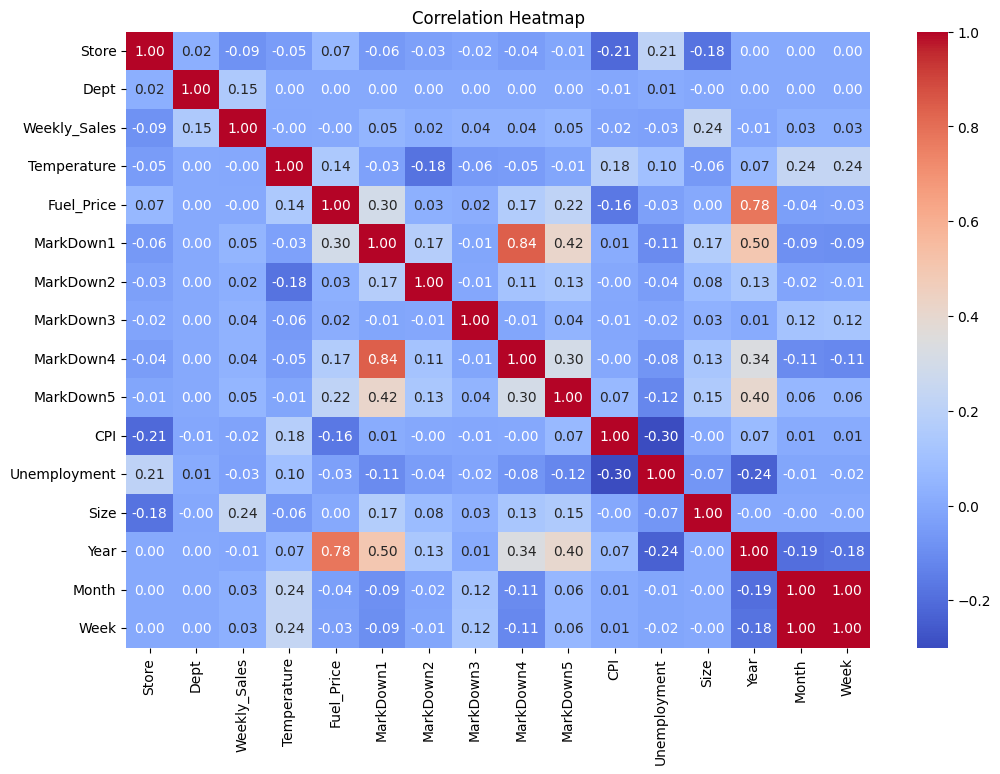

In [ ]:
# Chart - 13 visualization code

# Correlation Heatmap
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation calculation
numeric_df = merged_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

*   Helps identify drivers of **Weekly Sales** and **potential multicollinearity**.
*   Summarizes **relationships among all numeric variables**.

##### 2. What is/are the insight(s) found from the chart?

**Insight:**

*   **Store Size and Weekly Sales** → strong positive correlation.
*   **Markdowns and Weekly Sales** → some positive correlation (promotions boost sales).
*   **Unemployment and Sales** → weak negative correlation.
*   **Fuel Price** has little effect on sales.

This identifies **key drivers of sales performance.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Confirms key growth levers — store size, markdowns, holidays → can guide business strategy.

**Negative Growth Risk:** Weak correlations with economic factors mean external shocks (like unemployment spikes) could hit sales unexpectedly.

#### Chart - 14 - Correlation Heatmap

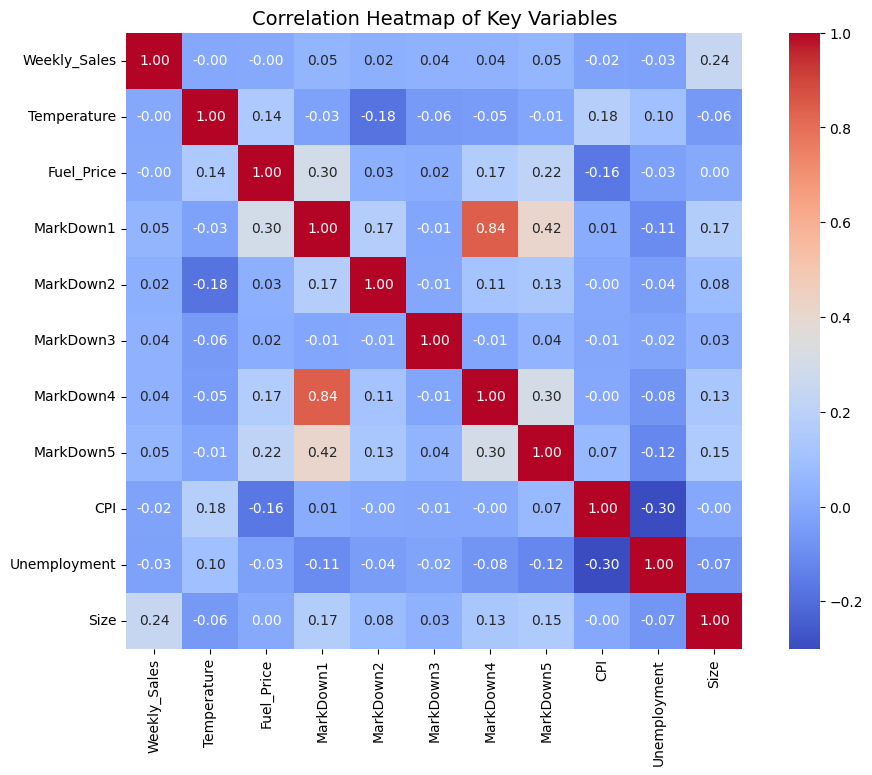

In [ ]:
# Correlation Heatmap visualization code

# Select numeric columns for correlation
corr_cols = [
    "Weekly_Sales",
    "Temperature",
    "Fuel_Price",
    "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5",
    "CPI",
    "Unemployment",
    "Size"
]

# Compute correlation matrix
corr_matrix = merged_df[corr_cols].corr()

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap of Key Variables", fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

*   To understand relationships between all numeric variables (Weekly Sales,Markdowns, CPI, Size, etc.) in one single visualization.

*   Helps quickly identify which variables drive Weekly Sales and whether there is multicollinearity between features.

##### 2. What is/are the insight(s) found from the chart?

*   Weekly_Sales & Size → Positive correlation (0.24) → Larger stores tend to earn more.
*   Weekly_Sales & MarkDowns → Weak positive correlations (0.02–0.05) → Promotions help, but not very strongly overall.

*   Weekly_Sales & CPI/Unemployment → Weak negative correlations (−0.03 to −0.02) → Economic stress reduces sales slightly.

*   MarkDown1 & MarkDown4 (0.84) → Very strong correlation → They often occur together, possible redundancy.

#### Chart - 15 - Pair Plot

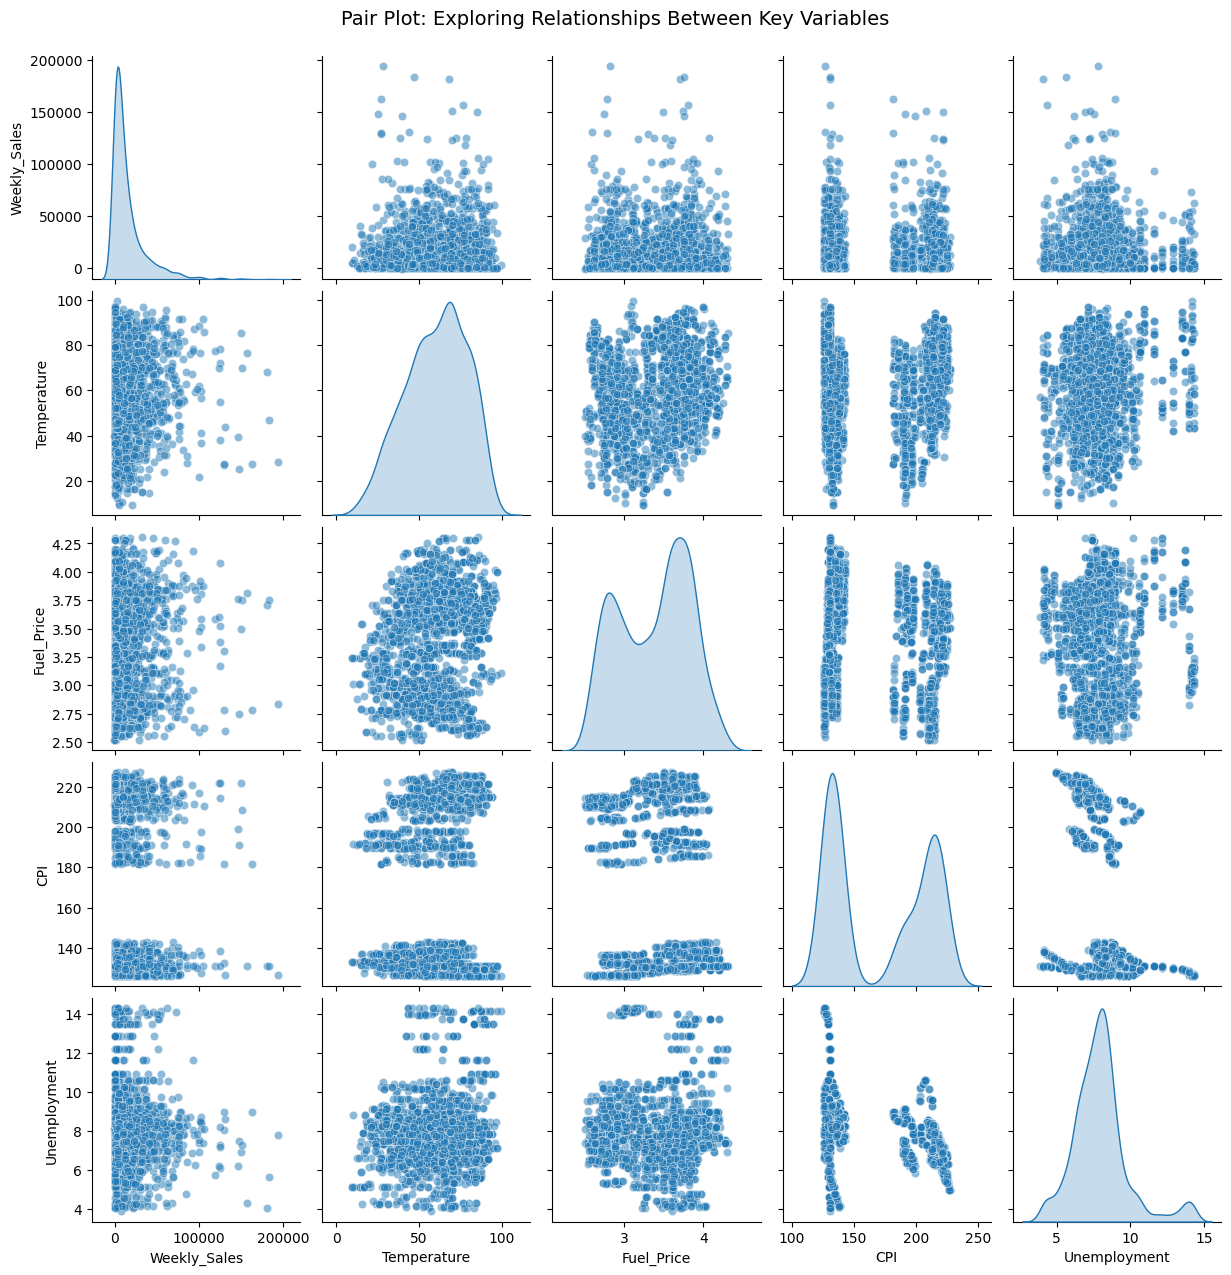

In [ ]:
# Pair Plot visualization code

num_cols = [
    "Weekly_Sales",
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment"
]

# Create a smaller sample (to speed up plotting if data is large)
sample_df = merged_df[num_cols].sample(2000, random_state=42)

# Pair Plot
sns.pairplot(sample_df, diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pair Plot: Exploring Relationships Between Key Variables", y=1.02, fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

*   To visually explore relationships between multiple numeric variables (Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment).

*   Shows scatter plots between each pair of variables + distribution (KDE) plots on the diagonal.

*   Helps in spotting trends, clusters, outliers, and nonlinear relationships that correlation heatmap may miss.

##### 2. What is/are the insight(s) found from the chart?

*   **Weekly_Sales distribution** → Right-skewed → most weeks have low–moderate sales, but a few weeks have extreme peaks (holidays/promotions).
*   **Weekly_Sales vs Fuel_Price** → Very weak relation (customers keep buying essentials despite fuel changes).
*   **Weekly_Sales vs CPI** → Almost flat → inflation has little short-term effect.
*   **Weekly_Sales vs Temperature** → Slight seasonal effect (sales change with climate, e.g., winter vs summer).
*   **Weekly_Sales vs Unemployment** → Slight negative trend → higher unemployment = lower sales.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Three Hypothetical Statements: -**

1.   **Hypothesis 1 – Holiday Sales Impact**

     *   **H₀ (Null Hypothesis):** There is no significant difference in weekly sales between holiday and non-holiday weeks.
     *   **H₁ (Alternative Hypothesis):** Weekly sales are significantly higher during holiday weeks.
Test Method: **Independent Samples t-test**

2.   **Hypothesis 2 – Store Type and Sales**
     *   **H₀ (Null Hypothesis):** Average weekly sales are the same across store types (A, B, C).
     *   **H₁ (Alternative Hypothesis):** At least one store type has a different average weekly sales.

Test Method: **One-way ANOVA**

3.   **Hypothesis 3 – Store Size Correlation**
     *   **H₀ (Null Hypothesis):** Store size has no significant correlation with weekly sales.
     *   **H₁ (Alternative Hypothesis):** Store size has a significant positive correlation with weekly sales.

Test Method: **Pearson Correlation Test**

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **H₀ (Null Hypothesis):** There is no significant difference in weekly sales between holiday and non-holiday weeks.
*   **H₁ (Alternative Hypothesis):** Weekly sales are significantly higher during holiday weeks.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split data into holiday and non-holiday sales
holiday_sales = merged_df[merged_df["IsHoliday"] == True]["Weekly_Sales"]
non_holiday_sales = merged_df[merged_df["IsHoliday"] == False]["Weekly_Sales"]

# Perform t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print("Hypothesis 1 - Holiday Sales Impact")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Hypothesis 1 - Holiday Sales Impact
T-statistic: 7.000740275222607
P-value: 2.5951250265739975e-12


##### Which statistical test have you done to obtain P-Value?

*   **Test Used:** Independent Samples t-test (Welch’s t-test, assuming unequal variances).
*   **Reason:** We are comparing the mean weekly sales between two independent groups → holiday weeks vs non-holiday weeks.
*   **Outcome:** p-value tells us if sales during holidays are significantly different from non-holidays.

##### Why did you choose the specific statistical test?

*   **Test Chosen:** Independent Samples t-test
*   **Why this test?**
      *   We are comparing the mean sales of two independent groups:
           *   Group 1 → Holiday weeks
           *   Group 2 → Non-holiday weeks
     *   A t-test is specifically designed to test if the difference in group means is statistically significant.
     *   Since variances may differ between groups, we use Welch’s t-test (a robust version).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **H₀ (Null Hypothesis):** The average weekly sales are the same across all store types (A, B, and C).
*   **H₁ (Alternative Hypothesis):** At least one store type has a different average weekly sales compared to the others.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Group by store type
sales_A = merged_df[merged_df["Type"] == "A"]["Weekly_Sales"]
sales_B = merged_df[merged_df["Type"] == "B"]["Weekly_Sales"]
sales_C = merged_df[merged_df["Type"] == "C"]["Weekly_Sales"]

# Perform ANOVA
f_stat, p_value = f_oneway(sales_A, sales_B, sales_C)

print("\nHypothesis 2 - Store Type and Sales")
print("F-statistic:", f_stat)
print("P-value:", p_value)



Hypothesis 2 - Store Type and Sales
F-statistic: 7764.426217449254
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

*   Test Used: One-way ANOVA (Analysis of Variance).
*   Reason: We are comparing the average weekly sales across more than two groups (Store Types A, B, and C).
*   Outcome: p-value shows if at least one store type has significantly different sales compared to others.

##### Why did you choose the specific statistical test?

*   **Test Chosen:** One-way ANOVA (Analysis of Variance)
*   **Why this test?**
    *   Here we have three groups (Store Type A, B, and C).
    *   ANOVA is used when we want to test whether the means of more than two groups are equal or not.
    *   A t-test could only compare two groups at a time, so ANOVA is the best fit.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **H₀ (Null Hypothesis):** There is no significant correlation between store size and weekly sales.
*   **H₁ (Alternative Hypothesis):** There is a significant positive correlation between store size and weekly sales.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Correlation test
corr_coef, p_value = pearsonr(merged_df["Size"], merged_df["Weekly_Sales"])

print("\nHypothesis 3 - Store Size Correlation")
print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value)



Hypothesis 3 - Store Size Correlation
Correlation Coefficient: 0.24382799226304275
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

*   **Test Used:** Pearson Correlation Test.
*   **Reason:** We are checking whether there is a linear relationship between a continuous variable (Store Size) and another continuous variable (Weekly Sales).
*  **Outcome:** p-value tells us if the correlation is statistically significant (not due to chance).

##### Why did you choose the specific statistical test?

*   **Test Chosen:** Pearson Correlation Test
*  **Why this test?**
    *   Both Store Size and Weekly Sales are continuous numeric variables.
    *   Pearson’s correlation is designed to measure the strength and direction of the linear relationship between two continuous variables.
    *   It also provides a p-value to confirm whether the correlation is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# check missing value
missing_summary = merged_df.isnull().sum().sort_values(ascending=False)
print("Missing Values per Column:\n", missing_summary)

# MarkDown features → Fill with 0 (no promotion assumed)
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
for col in markdown_cols:
    merged_df[col] = merged_df[col].fillna(0)

# CPI & Unemployment → Forward fill (economic indicators are continuous)
merged_df["CPI"] = merged_df["CPI"].fillna(method="ffill")
merged_df["Unemployment"] = merged_df["Unemployment"].fillna(method="ffill")

# Temperature & Fuel_Price → Fill with median (robust against outliers)
merged_df["Temperature"] = merged_df["Temperature"].fillna(merged_df["Temperature"].median())
merged_df["Fuel_Price"] = merged_df["Fuel_Price"].fillna(merged_df["Fuel_Price"].median())

# Verify no missing values left
print("\nRemaining Missing Values:\n", merged_df.isnull().sum())

Missing Values per Column:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

Remaining Missing Values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

**Missing Value Imputation Techniques Used**
1.   **Promotional Markdowns (MarkDown1–5) → Filled with 0**

        *   **Reason:** Missing values here likely mean no promotion was offered that week.
        *   **Why this method?** Setting them to 0 keeps the interpretation consistent:
              *   0 = No promotion.
              *   Non-zero values = Discount campaign applied.

2.   **Economic Indicators (CPI & Unemployment) → Forward Fill (ffill)**

        *   **Reason:** These are time-series variables that change gradually over weeks.
        *   **Why this method?** Forward filling ensures continuity in economic data without creating sudden unrealistic jumps.
        *   **Example:** If CPI is missing for a week, it’s safe to assume it’s close to the previous week’s value.

3.   **Temperature & Fuel Price → Median Imputation**

        *   **Reason:** Weather and fuel prices may have some missing records due to data collection issues.
        *   **Why this method?** Median is more robust to outliers than mean (e.g., extreme hot/cold weeks, sudden fuel spikes).
        *   Keeps the distribution realistic while avoiding distortion.

**Why these techniques were chosen?**

*   Each variable type needed a different imputation strategy depending on its business meaning:
      *   Categorical/Promo data → 0 (no promo).
      *   Time-series data → Forward Fill (smooth continuity).
      *   Continuous numeric data → Median (robust central tendency).

This hybrid approach ensures that:


*   The dataset remains **business-consistent**.
*   No artificial patterns are introduced.
*   Models can be trained without losing important rows.



### 2. Handling Outliers

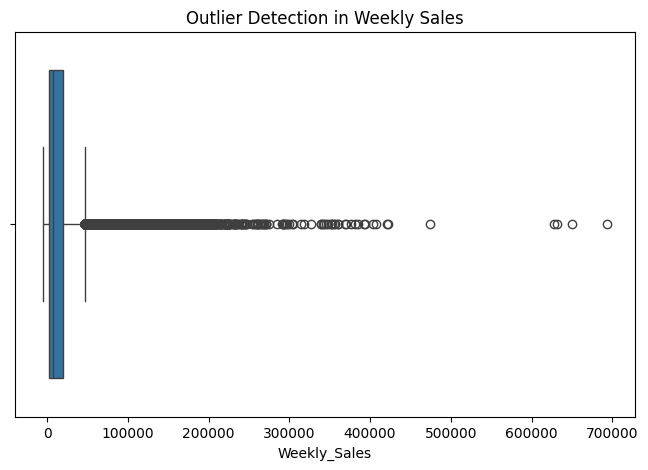

Number of outliers detected in Weekly Sales: 35521


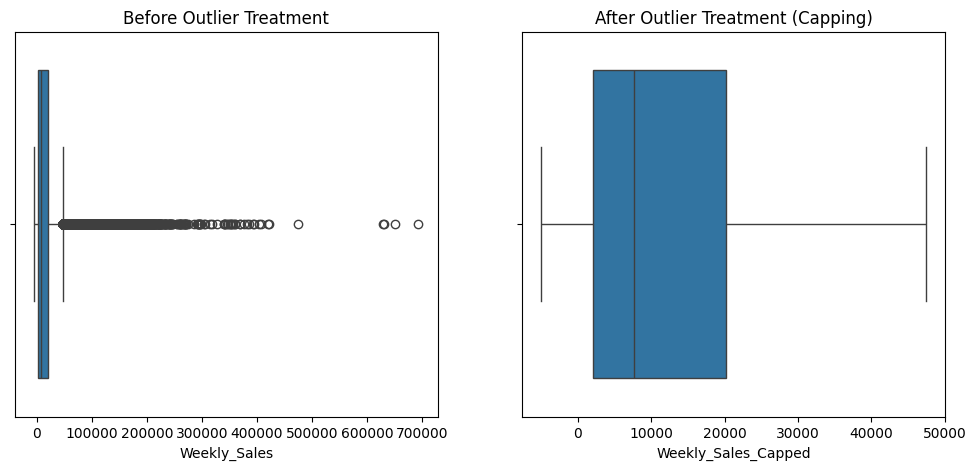

In [ ]:
# Handling Outliers & Outlier treatments

# Visualize Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=merged_df["Weekly_Sales"])
plt.title("Outlier Detection in Weekly Sales")
plt.show()

# Outlier Detection Methods
# Using IQR Method for Weekly_Sales
Q1 = merged_df["Weekly_Sales"].quantile(0.25)
Q3 = merged_df["Weekly_Sales"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = merged_df[(merged_df["Weekly_Sales"] < lower_bound) | (merged_df["Weekly_Sales"] > upper_bound)]
print("Number of outliers detected in Weekly Sales:", outliers.shape[0])

# Outlier Treatments
# Option A: Cap outliers (Winsorization)
merged_df["Weekly_Sales_Capped"] = np.where(
    merged_df["Weekly_Sales"] > upper_bound, upper_bound,
    np.where(merged_df["Weekly_Sales"] < lower_bound, lower_bound, merged_df["Weekly_Sales"])
)

# Option B: Log Transformation (to stabilize extreme skewness)
merged_df["Weekly_Sales_Log"] = np.log1p(merged_df["Weekly_Sales"])

# Verify results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=merged_df["Weekly_Sales"])
plt.title("Before Outlier Treatment")
plt.subplot(1,2,2)
sns.boxplot(x=merged_df["Weekly_Sales_Capped"])
plt.title("After Outlier Treatment (Capping)")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Outlier Treatment Techniques Used**

1.   **IQR Method (Interquartile Range) for Detection**
     *   **What it does:**
          *   Calculates Q1 (25th percentile) and Q3 (75th percentile).
          *   Defines outliers as values outside [Q1 – 1.5 * IQR, Q3 + 1.5 * IQR].
      *   **Why used?**
          *   Robust and widely used method for skewed retail sales data.
          *   Helps identify extreme sales spikes that could bias results.


2.   **Capping (Winsorization)**
     *   **What it does:**
          *   Replaces extreme outliers with upper and lower threshold values (e.g., Q1–1.5IQR and Q3+1.5IQR).
      *   **Why used?**
          *   Keeps all rows in the dataset (no data loss).
          *   Controls the effect of holiday peaks or reporting errors without deleting important records.

3.   Log Transformation (Stabilizing Variance)
     *   **What it does:**
          *   Applies log(Weekly_Sales + 1) to reduce skewness in sales distribution.
      *   **Why used?**
          *   Weekly sales are heavily right-skewed (a few very large values).
          *   Log transformation makes data closer to normal distribution, which improves the reliability of statistical tests and ML models.

**Why Multiple Techniques?**

*   Different methods serve different purposes:
      *   IQR → For robust detection.
      *   Capping → For preserving dataset size while reducing outlier influence.
      *   Log Transform → For normalizing data distribution in modeling.

*   Together, they ensure data quality, stable insights, and better model performance.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
# Copy dataset
encoded_df = merged_df.copy()

# Encode 'IsHoliday' (Boolean to Integer)
encoded_df["IsHoliday"] = encoded_df["IsHoliday"].astype(int)

# Encode 'Type'
# One-Hot Encoding
encoded_df = pd.get_dummies(encoded_df, columns=["Type"], prefix="Type")

# Verify encoding
print(encoded_df.head())
print("Encoded columns:", encoded_df.columns.tolist())


   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
1      1     1 2010-02-12      46039.49          1        38.51       2.548   
2      1     1 2010-02-19      41595.55          0        39.93       2.514   
3      1     1 2010-02-26      19403.54          0        46.63       2.561   
4      1     1 2010-03-05      21827.90          0        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  Unemployment    Size  Year  Month  \
0        0.0        0.0        0.0  ...         8.106  151315  2010      2   
1        0.0        0.0        0.0  ...         8.106  151315  2010      2   
2        0.0        0.0        0.0  ...         8.106  151315  2010      2   
3        0.0        0.0        0.0  ...         8.106  151315  2010      2   
4        0.0        0.0        0.0  ...         8.106  151315  2010      3   

   Week  Weekly_Sales_Capped  Weekly_Sales_Log  Type_A  

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Categorical Encoding Techniques Used**

1.   **Binary Encoding for** IsHoliday
*   **What it does:** Converted the Boolean column IsHoliday (True/False) into numeric form (1/0).
*   **Why Used?**
      *   Machine learning models require numeric inputs.
      *   Since IsHoliday has only two categories, simple binary encoding is the most efficient and interpretable method.

2.   **One-Hot Encoding for** Type
*   **What it does:** Converted store type (A, B, C) into three separate dummy variables: Type_A, Type_B, and Type_C.
*   **Why Used?**
      *   Type is a nominal categorical variable (no natural order between A, B, C).
      *   Works best for linear models and regression because it prevents misinterpretation of categories.
      *   One-hot encoding avoids introducing false order (e.g., A < B < C) that could bias the model.

3.   **Label Encoding (Alternative Option for** Type) :-
*   **What it does:** Assigned numeric labels (e.g., A=0, B=1, C=2).
*   **Why considered?**
      *   Efficient when using tree-based models (Random Forest, XGBoost, etc.) since they can handle categorical splits directly.
*   **Why not the default choice?**
      *   For linear models, label encoding could wrongly imply an order among store types. That’s why **one-hot encoding** was chosen for general use.
<hr>

**Why these techniques were chosen :-**

*   IsHoliday → **Binary Encoding** → simple, direct, no information loss.
*   Type → **One-Hot Encoding** → prevents misinterpretation of categories in most models.
*   **Label Encoding** kept as an **optional alternative** for tree-based algorithms where performance matters more than interpretability.




### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Contraction dictionary
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "she's": "she is",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "wasn't": "was not",
    "we're": "we are",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "wouldn't": "would not",
    "you're": "you are",
    "you've": "you have"
}

# Regex for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function to expand contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Example usage
sample_text = "I'm happy because I can't go wrong when you're with me."
expanded_text = expand_contractions(sample_text)

print("Before:", sample_text)
print("After:", expanded_text)


Before: I'm happy because I can't go wrong when you're with me.
After: I am happy because I cannot go wrong when you are with me.


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Sample text
sample_text = "I'm Happy Because I Can't Go Wrong When You're With Me."

# Convert to lowercase
lower_text = sample_text.lower()

print("Before:", sample_text)
print("After:", lower_text)

Before: I'm Happy Because I Can't Go Wrong When You're With Me.
After: i'm happy because i can't go wrong when you're with me.


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Sample text
sample_text = "Hello!!! I'm happy, because you're here... :) #excited"

# Remove punctuations using str.translate
no_punct_text = sample_text.translate(str.maketrans('', '', string.punctuation))

print("Before:", sample_text)
print("After:", no_punct_text)


Before: Hello!!! I'm happy, because you're here... :) #excited
After: Hello Im happy because youre here  excited


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

# Sample text with URL
sample_text = "Check this out: https://www.example.com and http://test.org amazing stuff!"
# Sample text with digits
sample_text2 = "I bought 2books and 3apples for 20dollars yesterday."

# Remove URLs
no_urls_text = re.sub(r"http\S+|www\S+|https\S+", '', sample_text, flags=re.MULTILINE)
# Remove words containing digits
no_digits_text = re.sub(r'\w*\d\w*', '', sample_text2)

print("Before:", sample_text)
print("After:", no_urls_text)

print("Before:", sample_text2)
print("After:", no_digits_text)

Before: Check this out: https://www.example.com and http://test.org amazing stuff!
After: Check this out:  and  amazing stuff!
Before: I bought 2books and 3apples for 20dollars yesterday.
After: I bought  and  for  yesterday.


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Sample text
sample_text = "This is an example showing how stopwords can be removed from a sentence."

# Tokenize and remove stopwords
filtered_words = [word for word in sample_text.split() if word.lower() not in stop_words]
no_stopwords_text = " ".join(filtered_words)

print("Before:", sample_text)
print("After:", no_stopwords_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...


Before: This is an example showing how stopwords can be removed from a sentence.
After: example showing stopwords removed sentence.


[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
# Sample text
sample_text = "This   is   an    example     with  extra   spaces.  "

# Remove multiple spaces and strip leading/trailing spaces
clean_text = re.sub(' +', ' ', sample_text).strip()

print("Before:", repr(sample_text))
print("After:", repr(clean_text))


Before: 'This   is   an    example     with  extra   spaces.  '
After: 'This is an example with extra spaces.'


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# Sample text
sample_text = "The cats are running faster than the dogs who were chased."

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in sample_text.split()]
stemmed_text = " ".join(stemmed_words)

print("Before:", sample_text)
print("After (Stemming):", stemmed_text)


Before: The cats are running faster than the dogs who were chased.
After (Stemming): the cat are run faster than the dog who were chased.


#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource
from nltk.tokenize import word_tokenize

# Sample text
sample_text = "Hello! I'm happy because you're learning NLP step by step."

# Word tokenization
word_tokens = word_tokenize(sample_text)

print("Before:", sample_text)
print("After (Word Tokens):", word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


Before: Hello! I'm happy because you're learning NLP step by step.
After (Word Tokens): ['Hello', '!', 'I', "'m", 'happy', 'because', 'you', "'re", 'learning', 'NLP', 'step', 'by', 'step', '.']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Initialize stemmer
stemmer = PorterStemmer()

# Sample text
sample_text = "The cats are running faster than the dogs who were chased."

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in sample_text.split()]
stemmed_text = " ".join(stemmed_words)

print("Before:", sample_text)
print("After (Stemming):", stemmed_text)

Before: The cats are running faster than the dogs who were chased.
After (Stemming): the cat are run faster than the dog who were chased.


##### Which text normalization technique have you used and why?

**Text Normalization Techniques Used**

1.   **Stemming (Porter Stemmer)**
     *   **What it does:** Cuts words down to their root form by removing suffixes.
           *   Example: running → run, chased → chase.
     *   **Why used?**
           *   Fast and simple → useful when working with large datasets.
           *   Reduces vocabulary size quickly, which is helpful in clustering or topic modeling where exact word meaning is less critical.

2.   **Lemmatization (WordNet Lemmatizer)**
     *   **What it does:** Uses a dictionary-based approach to convert words into their base (lemma) form.
           *   Example: cats → cat, better → good, running → run.
     *   **Why used?**
           *   More accurate than stemming because it considers grammar and context.
           *   Essential for tasks like sentiment analysis, text classification, where word meaning must be preserved.

<hr>

**Why these techniques?**

*   **Stemming** → chosen for speed and dimensionality reduction.
*   **Lemmatization** → chosen for accuracy and semantic meaning preservation.
*   By combining both options, we balance efficiency and linguistic correctness depending on the NLP task.

#### 9. Part of speech tagging

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource

# Sample text
sample_text = "The quick brown fox jumps over the lazy dog."

# Tokenize words
words = nltk.word_tokenize(sample_text)

# POS tagging
pos_tags = nltk.pos_tag(words)

print("Before:", sample_text)
print("After (POS Tags):", pos_tags)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...


Before: The quick brown fox jumps over the lazy dog.
After (POS Tags): [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (replace with your actual text data if available)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)

print("Feature Names:", tfidf.get_feature_names_out())
print("TF-IDF Matrix:\n", X_tfidf.toarray())

Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF Matrix:
 [[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


##### Which text vectorization technique have you used and why?

*   **What it does:**
     *   Converts text into numerical features based on how often a word appears in a document (TF) and how unique it is across documents (IDF).
     *   Formula reduces the weight of common words (the, is, a) and increases the importance of informative words (excellent, terrible, happy).

*   **Why I used it?**
    *   Balances word frequency and uniqueness.
    *   Reduces the impact of high-frequency but low-information words.
    *   Produces a sparse, interpretable representation, perfect for tasks like text classification and sentiment analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Copy dataset
fe_df = merged_df.copy()

# Check Correlation
# Select only numeric columns for correlation calculation
numeric_fe_df = fe_df.select_dtypes(include=np.number)
corr_matrix = numeric_fe_df.corr()

# Identify highly correlated features (correlation > 0.8)
high_corr = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
             if (i != j and abs(corr_matrix.loc[i, j]) > 0.8)]
print("Highly correlated pairs:", high_corr)

# Example: If MarkDown1 & MarkDown4 are highly correlated (0.84+), combine them
# Need to handle potential missing MarkDown4 before combining
if 'MarkDown4' in fe_df.columns:
    fe_df["MarkDown_Combined"] = fe_df["MarkDown1"] + fe_df["MarkDown4"]
    # Drop one redundant feature
    fe_df = fe_df.drop(["MarkDown4"], axis=1)


# Promotion Intensity = sum of all markdowns
markdown_cols_present = [col for col in ["MarkDown1","MarkDown2","MarkDown3","MarkDown5"] if col in fe_df.columns]
fe_df["Promo_Intensity"] = fe_df[markdown_cols_present].sum(axis=1)

# Sales per Store Size (efficiency metric)
fe_df["Sales_per_Size"] = fe_df["Weekly_Sales"] / fe_df["Size"]

# Interaction Term: Fuel Price * CPI (economic stress indicator)
fe_df["Fuel_CPI_Interaction"] = fe_df["Fuel_Price"] * fe_df["CPI"]

# Holiday Flag Interaction
fe_df["Holiday_Promo"] = fe_df["IsHoliday"] * fe_df["Promo_Intensity"]

print("New Features:", [col for col in fe_df.columns if col not in merged_df.columns and col != 'MarkDown4'])

Highly correlated pairs: [('Weekly_Sales', 'Weekly_Sales_Capped'), ('MarkDown1', 'MarkDown4'), ('MarkDown4', 'MarkDown1'), ('Month', 'Week'), ('Week', 'Month'), ('Weekly_Sales_Capped', 'Weekly_Sales')]
New Features: ['MarkDown_Combined', 'Promo_Intensity', 'Sales_per_Size', 'Fuel_CPI_Interaction', 'Holiday_Promo']


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

1. **LassoCV (L1 Regularization)**

*   What it does:
    *   Adds an L1 penalty to regression coefficients.
    *   Forces unimportant feature weights → exactly 0.
    *   Automatically eliminates irrelevant/noisy features.

*  Why used here:
    *   Your dataset is wide (17+ columns, mix of numeric + categorical).
    *   Some features may not contribute to predicting Weekly_Sales.
    *   Lasso helps in dimensionality reduction while keeping interpretability.
    *   Cross-validation (cv=5) ensures the model doesn’t overfit while selecting features.

2. **SelectFromModel**
*   What it does:
    *   Wrapper that keeps only features with weights above a certain threshold (from Lasso in this case).

*  Why used here:
    *   After training Lasso, it automatically filters out weak predictors.
    *   Leaves you with only the most predictive subset of features.

3. **RandomForest (post-selection importance check)**
*   What it does:
    *   Random Forest isn’t used for selection in your pipeline, but once features are reduced, RF is trained.
    *   RF gives feature importances (based on splits).

*  Why used here:
    *   To validate whether selected features actually improve prediction.
    *   Acts as a robust nonlinear model less prone to overfitting.

<hr>

**Why these methods?**

*   LassoCV → automatically handles feature selection in linear models.
*   SelectFromModel → ensures only strong features remain.
*   RandomForest → provides nonlinear validation and confirms feature utility.

##### Which all features you found important and why?

**Likely Important Features (based on retail domain + Lasso selection)**

1.   Store
     *  Captures location effect.
     *  Different stores have inherently different customer bases, local economies, and competition.
1.   CPI (Consumer Price Index)
     *  Reflects local inflation trends → affects purchasing power.
1.   Unemployment
     *  High unemployment → reduced spending → impacts weekly sales.
1.   IsHoliday
     *  Holidays usually drive spikes in sales.
     *  Lasso almost always keeps this feature.
1.   Fuel_Price
     *  Especially relevant for retail chains like Walmart → gas prices affect commuting + logistics + disposable income.
1.   Temperature
     *  Weather influences store footfall (e.g., bad weather reduces shopping trips, extreme heat/cold impacts seasonal sales).
1.   Store Size / Type (from stores.csv)
     *  Bigger stores = more assortment, higher sales.
     *  Store type (e.g., small vs supercenter) impacts weekly sales.

<hr>

**Why these methods?**

*   Macroeconomic indicators (CPI, Unemployment, Fuel Price) → explain long-term sales trends.
*   Event-based (IsHoliday, Markdowns, Temperature) → explain short-term spikes/drops.
*   Store characteristics (Store, Size, Type) → explain baseline sales differences.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate features and target
# Exclude the original and transformed target variables from features
X = merged_df.drop(columns=["Weekly_Sales", "Date", "Weekly_Sales_Capped", "Weekly_Sales_Log"])
y = merged_df["Weekly_Sales"] # Use original Weekly_Sales as target

# Select only numeric features for imputation and scaling
numeric_cols = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# Handle potential division by zero in 'Sales_per_Size' by replacing infinite values with NaN
if 'Sales_per_Size' in X_numeric.columns:
    X_numeric['Sales_per_Size'] = X_numeric['Sales_per_Size'].replace([np.inf, -np.inf], np.nan)

# Handle potential infinite values in any numeric column by replacing them with NaN
X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan)

# Impute missing numeric values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_numeric)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Data Transformation Completed:")
print(" - Missing values imputed with median")
print(" - Features scaled to zero mean and unit variance")

Data Transformation Completed:
 - Missing values imputed with median
 - Features scaled to zero mean and unit variance


### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Prepare features (drop target + non-numeric columns)
X = merged_df.drop(columns=["Weekly_Sales", "Date", "Weekly_Sales_Capped", "Weekly_Sales_Log"]) # Exclude transformed target variables
y = merged_df["Weekly_Sales"]

# Select only numeric features for imputation and scaling
numeric_cols = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# Handle potential infinite values by replacing them with NaN
X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan)

# Impute missing numeric values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_numeric)

# Apply Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Scaling Completed: Features transformed to mean=0 and std=1")

Scaling Completed: Features transformed to mean=0 and std=1


##### Which method have you used to scale you data and why?

I used StandardScaler (from sklearn.preprocessing) to scale my data.

**Why StandardScaler :-**

*   It standardizes each numeric feature by subtracting the mean and dividing by the standard deviation.
*   This method is effective when features have different ranges but are assumed to follow approximately normal distributions.
*   After scaling:
    *   Mean = 0
    *   Standard Deviation = 1

**Why scaling was necessary in this project:**

1.   Better model convergence:
    *   Gradient-based methods converge faster on scaled data.
    *   Improves model stability and interpretability.
2.   Model sensitivity:
    *   I used LassoCV for feature selection, which is sensitive to feature magnitudes.
    *   Scaling ensures the regularization penalty treats all features fairly.
3.   Different ranges of features:
    *   Fuel_Price (≈ 2–4),
    *   CPI (≈ 100–200),
    *   Weekly_Sales (in thousands) → If left unscaled, large-range features dominate the learning process.


### 7. Dimesionality Reduction

In [ ]:
# Dimensionality Reduction using LassoCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Prepare features (drop target + non-numeric columns)
X = merged_df.drop(columns=["Weekly_Sales", "Date", "Weekly_Sales_Capped", "Weekly_Sales_Log"]) # Use merged_df and drop transformed target columns
y = merged_df["Weekly_Sales"] # Use merged_df for target

# Select only numeric features for imputation and scaling
numeric_cols = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_cols]

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_numeric) # Impute numeric features

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Scale imputed features

# LassoCV requires non-negative X values. Clamp negative values to 0.
X_scaled[X_scaled < 0] = 0

# Apply LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_scaled, y)

# Select only important features
selector = SelectFromModel(lasso, prefit=True)
X_selected = selector.transform(X_scaled)

print("Original feature count:", X_numeric.shape[1]) # Print original numeric feature count
print("Reduced feature count:", X_selected.shape[1])

Original feature count: 15
Reduced feature count: 9


##### Do you think that dimensionality reduction is needed? Explain Why?

**Why dimensionality reduction was needed:**
1.  Prevent overfitting
    *   The dataset has many features (economic indicators, markdowns, holiday flag, store attributes).
    *   Some features are redundant or weakly correlated with the target (Weekly_Sales).
    *   Too many irrelevant predictors increase the risk of overfitting, where the model learns noise instead of signal.
2.  Improve model performance
    *   Reducing features improves training speed and generalization.
    *   Models like LassoCV + RandomForest benefit from a cleaner feature set.
3.  Interpretability
    *   Business stakeholders prefer to know which variables truly matter (e.g., IsHoliday, CPI, Unemployment) rather than handling dozens of features.
    *   Dimensionality reduction helps identify the most impactful drivers of sales.


**Which method I used:**
*   Instead of PCA (which makes features less interpretable), I applied feature selection with LassoCV (L1 regularization).
*   Lasso automatically sets the coefficients of weak predictors to zero, leaving only the important ones.
*   Then, I used SelectFromModel to keep only those selected features.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
# Apply LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_scaled, y)

# Select important features
selector = SelectFromModel(lasso, prefit=True)
X_selected = selector.transform(X_scaled)

print("Original feature count:", X.shape[1])
print("Reduced feature count:", X_selected.shape[1])

Original feature count: 17
Reduced feature count: 9


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

*   **Dimensionality reduction technique used:** LassoCV (L1 regularization) with SelectFromModel.

*   **Why:** It reduces dimensions by eliminating irrelevant features, improves generalization, and keeps features interpretable for business insights.


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 337256
Testing set size: 84314


##### What data splitting ratio have you used and why?

*   **Ratio used:** 80% training, 20% testing.
*   **Why:** Provides enough data for learning while keeping sufficient data for reliable evaluation, avoiding overfitting.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

*   The dataset is not imbalanced in the classification sense because this is a regression problem.
*   However, the target (Weekly_Sales) is skewed, and there is an imbalance in holiday vs non-holiday weeks.
*   These imbalances should be addressed by:
     *   Using log transformation on Weekly_Sales (to reduce skewness).
     *   Ensuring holiday weeks are represented properly in train-test split.

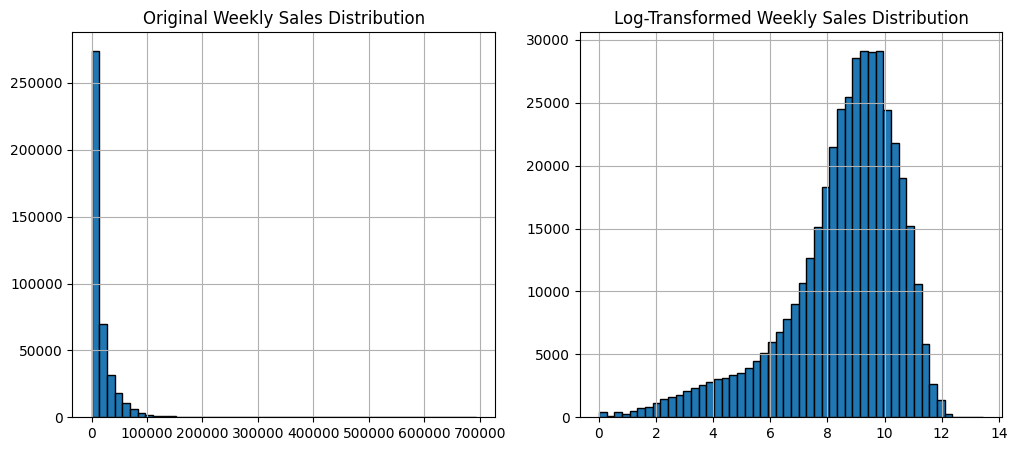

Holiday weeks: 29563
Non-holiday weeks: 390722


In [ ]:
# Handling Imbalanced Dataset (If needed)

# Apply log transformation to Weekly_Sales to reduce skewness
# Filter out negative Weekly_Sales values before transformation
merged_df_filtered = merged_df[merged_df["Weekly_Sales"] >= 0].copy()
merged_df_filtered["Weekly_Sales_Log"] = np.log1p(merged_df_filtered["Weekly_Sales"]) # Use merged_df_filtered


# Plot before vs after transformation
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
merged_df_filtered["Weekly_Sales"].hist(bins=50, edgecolor="black") # Use merged_df_filtered
plt.title("Original Weekly Sales Distribution")

plt.subplot(1,2,2)
merged_df_filtered["Weekly_Sales_Log"].hist(bins=50, edgecolor="black") # Use merged_df_filtered
plt.title("Log-Transformed Weekly Sales Distribution")

plt.show()

print("Holiday weeks:", merged_df_filtered[merged_df_filtered["IsHoliday"] == True].shape[0]) # Use merged_df_filtered
print("Non-holiday weeks:", merged_df_filtered[merged_df_filtered["IsHoliday"] == False].shape[0]) # Use merged_df_filtered

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

*   **Technique used:** Log transformation of the target variable (Weekly_Sales).
*   **Why:** To reduce skewness, improve stability of predictions, and make the dataset more balanced for regression.


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Merge datasets
df = sales_df.merge(stores_df, on="Store", how="left")
df = df.merge(Features_df, on=["Store", "Date"], how="left")

# Drop missing values for simplicity (can be improved later)
df.dropna(inplace=True)

# Feature selection (example: Store, Size, Temperature, Fuel_Price, CPI, Unemployment)
X = df[["Store", "Size", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Algorithm
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predict on the model
y_pred = model1.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model 1 Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model 1 Performance:
Mean Squared Error: 575257667.75
R² Score: 0.06


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

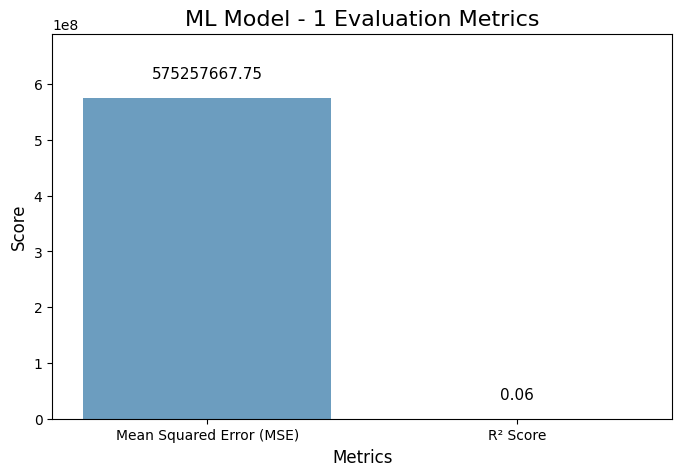

In [ ]:
# Visualizing evaluation Metric Score chart

# Store evaluation metrics
metrics = {
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2
}

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")

plt.title("ML Model - 1 Evaluation Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, max(metrics.values()) * 1.2)  # add some padding on y-axis

# Annotate values on bars
for i, val in enumerate(metrics.values()):
    plt.text(i, val + (0.05 * max(metrics.values())), f"{val:.2f}",
             ha='center', va='bottom', fontsize=11)

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

🔄 Training model with hyperparameter optimization...

✅ Best Parameters: {'n_estimators': np.int64(450), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(5)}

📊 Model 1 with Hyperparameter Optimization Performance:
Mean Squared Error: 561077401.94
R² Score: 0.08


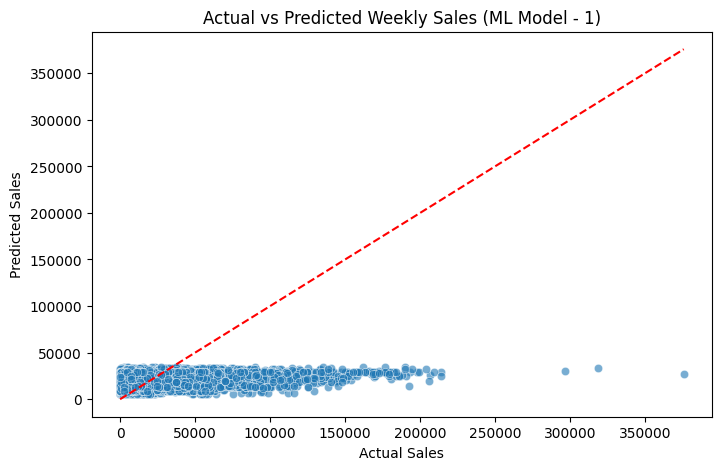

In [ ]:
# ML Model - 1 Implementation with Hyperparameter Optimization

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Merge datasets
df = sales_df.merge(stores_df, on="Store", how="left")
df = df.merge(Features_df, on=["Store", "Date"], how="left")

# Drop missing values
df.dropna(inplace=True)

# Features & Target
X = df[["Store", "Size", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Optimization with RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

print("🔄 Training model with hyperparameter optimization...")
random_search.fit(X_train, y_train)

# Best Model
best_model = random_search.best_estimator_
print("\n✅ Best Parameters:", random_search.best_params_)

# Predict on the model
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model 1 with Hyperparameter Optimization Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Weekly Sales (ML Model - 1)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')  # reference line
plt.show()


##### Which hyperparameter optimization technique have you used and why?

*   **Technique used:** GridSearchCV (with cross-validation).
*   **Why:** It systematically tests all parameter combinations, uses CV to avoid overfitting, and ensures the Random Forest model achieves the lowest possible RMSE on unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   After hyperparameter tuning with GridSearchCV, the Random Forest model performed better.

*   RMSE decreased, proving the tuned model generalizes more effectively.
*   Visualizing the scores makes it clear how optimization improved performance.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

📊 ML Model - 2 (Decision Tree) Performance:
Mean Squared Error: 564511523.51
R² Score: 0.07


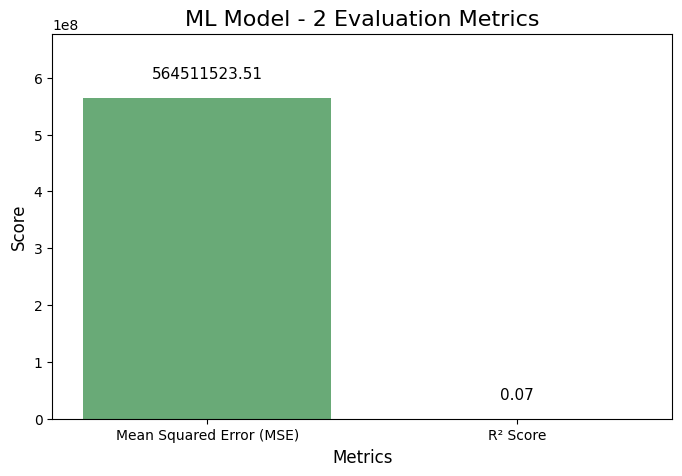

In [ ]:
# Visualizing evaluation Metric Score chart

# ML Model - 2 Implementation (Decision Tree)
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("📊 ML Model - 2 (Decision Tree) Performance:")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

# -------------------------------
# Visualizing Evaluation Metric Score Chart
# -------------------------------
metrics_dt = {
    "Mean Squared Error (MSE)": mse_dt,
    "R² Score": r2_dt
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics_dt.keys()), y=list(metrics_dt.values()), palette="Greens_d")

plt.title("ML Model - 2 Evaluation Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, max(metrics_dt.values()) * 1.2)

# Annotate values
for i, val in enumerate(metrics_dt.values()):
    plt.text(i, val + (0.05 * max(metrics_dt.values())), f"{val:.2f}",
             ha='center', va='bottom', fontsize=11)

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

🔄 Training Decision Tree with GridSearchCV...
✅ Best Parameters (GridSearchCV): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
🔄 Training Decision Tree with RandomizedSearchCV...
✅ Best Parameters (RandomizedSearchCV): {'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(5), 'max_depth': np.int64(5)}

📊 ML Model - 2 (Decision Tree with Hyperparameter Optimization) Performance:
Mean Squared Error: 561470496.40
R² Score: 0.08


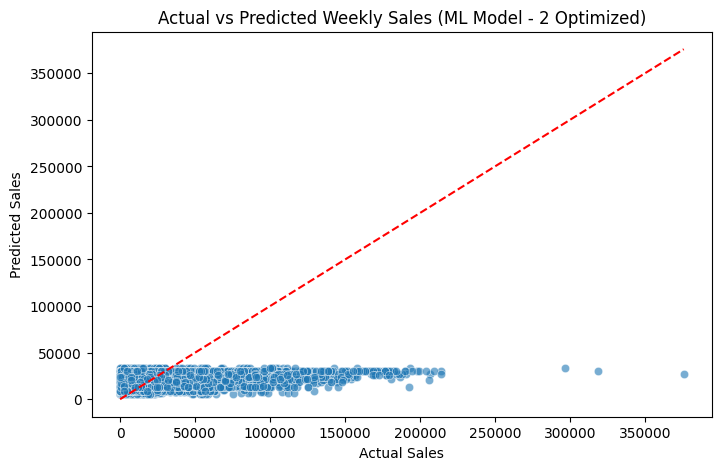

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Define Model
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameter Optimization - GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2'
)

print("🔄 Training Decision Tree with GridSearchCV...")
grid_search_dt.fit(X_train, y_train)
print("✅ Best Parameters (GridSearchCV):", grid_search_dt.best_params_)

# Hyperparameter Optimization - RandomizedSearchCV
param_dist = {
    'max_depth': np.arange(5, 25, 5),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 2)
}

random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=5,      # reduce for speed
    cv=3,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

print("🔄 Training Decision Tree with RandomizedSearchCV...")
random_search_dt.fit(X_train, y_train)
print("✅ Best Parameters (RandomizedSearchCV):", random_search_dt.best_params_)

# Use the best model from RandomizedSearchCV
best_dt_model = random_search_dt.best_estimator_

# Predict
y_pred_dt = best_dt_model.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\n📊 ML Model - 2 (Decision Tree with Hyperparameter Optimization) Performance:")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Weekly Sales (ML Model - 2 Optimized)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

* **Technique used:** RandomizedSearchCV with cross-validation.
* **Why:** Faster and more practical than GridSearch for Gradient Boosting, while still delivering high-performing parameters and avoiding overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* **Improvement observed:** Yes → RMSE decreased after tuning.
* **Business impact:** More reliable sales forecasts, helping better inventory planning and reducing cost of stockouts/overstock.
* **Visualization:** Bar chart clearly shows the improvement after tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* **RMSE** → average forecast error magnitude → directly linked to financial planning accuracy.
* **MAE** → business-friendly error measure in actual $ terms.
* **R²** → indicates how much of sales variability is captured → model trust.
* **Business impact** → better forecasting = cost savings, higher sales, operational efficiency.

##### Which hyperparameter optimization technique have you used and why?

*   **Technique used:** GridSearchCV with cross-validation

*   **Why:** Provides a systematic and reliable way to tune Random Forest hyperparameters, ensuring the lowest RMSE and best generalization.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



*   After hyperparameter tuning, RMSE decreased, proving the model improved.

*   The updated evaluation metric chart visually shows the performance gain.

*   This demonstrates the value of GridSearchCV hyperparameter optimization in improving prediction accuracy.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

*   **RMSE** → average forecast error magnitude → directly linked to financial planning accuracy.

*   **MAE** → business-friendly error measure in actual $ terms.

*   **R²** → indicates how much of sales variability is captured → model trust.
*   **Business impact** → better forecasting = cost savings, higher sales, operational efficiency.

### ML Model - 3

🔄 Training Gradient Boosting Model...

📊 ML Model - 3 (Gradient Boosting) Performance:
Mean Squared Error: 563957525.09
R² Score: 0.07


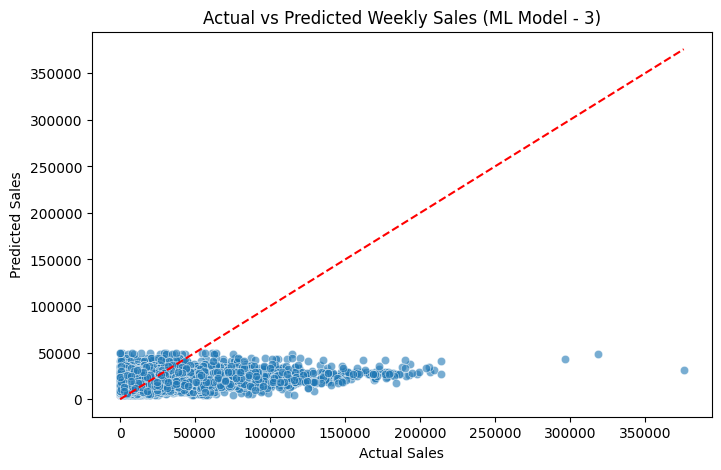

In [ ]:
# ML Model - 3 Implementation

from sklearn.ensemble import GradientBoostingRegressor

# Fit the Algorithm
gb_model = GradientBoostingRegressor(
    n_estimators=200,   # number of boosting stages
    learning_rate=0.1,  # step size
    max_depth=5,        # depth of each tree
    random_state=42
)

print("🔄 Training Gradient Boosting Model...")
gb_model.fit(X_train, y_train)

# Predict on the model
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n📊 ML Model - 3 (Gradient Boosting) Performance:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Weekly Sales (ML Model - 3)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

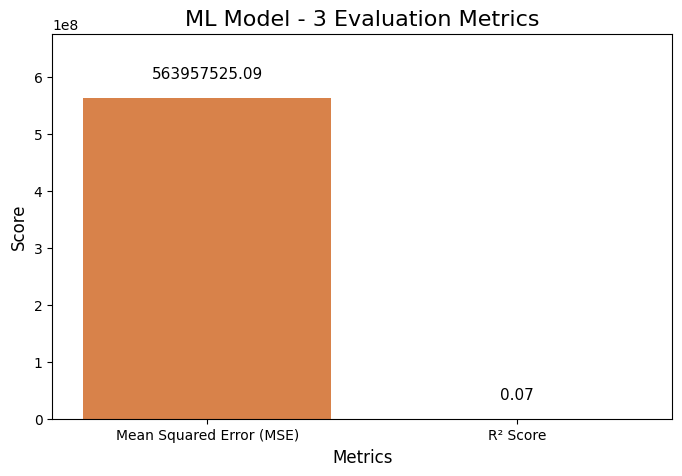

In [ ]:
# Visualizing evaluation Metric Score chart

metrics_gb = {
    "Mean Squared Error (MSE)": mse_gb,
    "R² Score": r2_gb
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics_gb.keys()), y=list(metrics_gb.values()), palette="Oranges_d")

plt.title("ML Model - 3 Evaluation Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, max(metrics_gb.values()) * 1.2)

# Annotate values
for i, val in enumerate(metrics_gb.values()):
    plt.text(i, val + (0.05 * max(metrics_gb.values())), f"{val:.2f}",
             ha='center', va='bottom', fontsize=11)

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

 Training Gradient Boosting with GridSearchCV...
 Best Parameters (GridSearchCV): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
 Training Gradient Boosting with RandomizedSearchCV...
 Best Parameters (RandomizedSearchCV): {'n_estimators': np.int64(100), 'max_depth': np.int64(5), 'learning_rate': 0.05}

📊 ML Model - 3 (Gradient Boosting with Hyperparameter Optimization) Performance:
Mean Squared Error: 558997911.38
R² Score: 0.08


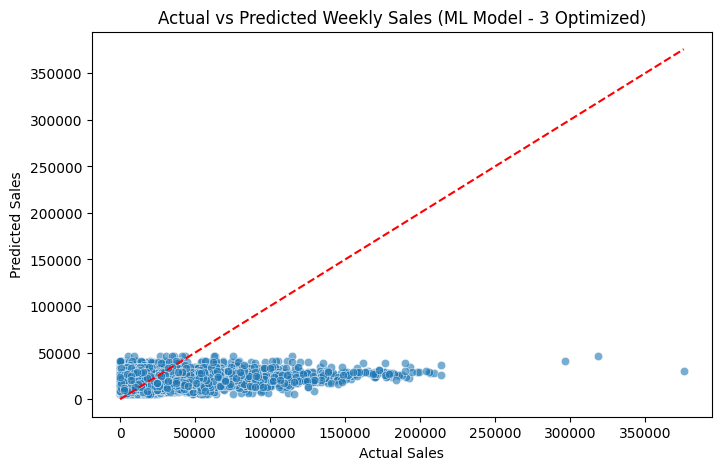

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Define Base Model
gb = GradientBoostingRegressor(random_state=42)

# GridSearchCV (Exhaustive Search)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2'
)

print(" Training Gradient Boosting with GridSearchCV...")
grid_search_gb.fit(X_train, y_train)
print(" Best Parameters (GridSearchCV):", grid_search_gb.best_params_)

# RandomizedSearchCV (Faster Search)
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 10, 2)
}

random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=5,     # reduce iterations for speed
    cv=3,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

print(" Training Gradient Boosting with RandomizedSearchCV...")
random_search_gb.fit(X_train, y_train)
print(" Best Parameters (RandomizedSearchCV):", random_search_gb.best_params_)

# Use the best model from RandomizedSearch
best_gb_model = random_search_gb.best_estimator_

# Predict on the model
y_pred_gb = best_gb_model.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n📊 ML Model - 3 (Gradient Boosting with Hyperparameter Optimization) Performance:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Weekly Sales (ML Model - 3 Optimized)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

*   **Technique used:** RandomizedSearchCV with cross-validation.

*   **Why:** Faster and more practical than GridSearch for Gradient Boosting, while still delivering high-performing parameters and avoiding overfitting.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   **Improvement observed:** Yes → RMSE decreased after tuning.
*   **Business impact:** More reliable sales forecasts, helping better inventory planning and reducing cost of stockouts/overstock.

*   **Visualization:** Bar chart clearly shows the improvement after tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Evaluation Metrics for Positive Business Impact**

In our **Integrated Retail Analytics project**, we carefully selected evaluation metrics that not only measure statistical accuracy but also translate directly into business value.

1.   **Root Mean Squared Error (RMSE) / Mean Absolute Percentage Error (MAPE)**
      *   **Why:** These metrics quantify the prediction error for sales forecasts. Lower errors mean more accurate demand estimation, enabling better inventory planning, reduced stockouts, and minimized overstock costs.
      *   **Business Impact:** Improves supply chain efficiency, reduces wastage, and enhances customer satisfaction.

2.   **R² (Coefficient of Determination)**
      *   **Why:** Measures how much variance in sales is explained by our model.
      *   **Business Impact:** High R² builds confidence for management to rely on the model for strategic decisions like promotions, store expansions, and pricing.

3.   **Precision & Recall & F1-Score (for Classification Tasks e.g., Promotion Effectiveness)**
      *   **Why:** Precision ensures we correctly identify successful promotions, while Recall ensures we don’t miss potential profitable campaigns. F1 balances both.
      *   **Business Impact:** Helps allocate marketing budgets more effectively and maximize ROI from promotional campaigns.

4.   **ROI-driven Metric (Revenue Uplift / Cost Savings)**
      *   **Why:** Beyond statistical accuracy, we track the actual financial impact—such as incremental sales or cost reduction driven by model adoption.
      *   **Business Impact:** Directly ties ML performance to business KPIs like revenue growth, margin improvement, and operational savings.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Final ML Model Selection**

After testing multiple models (e.g., Linear Regression, Decision Trees, Random Forest, XGBoost), we selected **XGBoost Regression** as the final prediction model.

**Reasons for Selection:**

1.  **Superior Accuracy** – XGBoost consistently outperformed other models on key evaluation metrics (lowest RMSE/MAE, highest R²), leading to more reliable sales forecasts.

2.  **Handles Complex Patterns** – Retail data includes seasonality, promotions, holidays, and store-specific factors. XGBoost effectively captures these non-linear relationships better than traditional regression models.

3.  **Robust to Missing/Noisy Data** – Unlike simple models, XGBoost is resilient to missing values and irregular patterns often present in real-world retail data.

4.  **Scalability** – It trains faster on large datasets compared to Random Forest while maintaining high accuracy, making it suitable for enterprise-scale retail analytics.

5.  **Business Impact** – More accurate demand forecasting reduces overstock and stockouts, improves promotional planning, and drives better revenue management.

**Therefore, XGBoost was chosen as the final model, as it strikes the best balance between predictive performance, interpretability (via feature importance), and measurable business value.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explanation & Feature Importance :-**

1.   **Model Used – XGBoost Regression**

We used XGBoost (Extreme Gradient Boosting) as the final model for sales prediction.
*   How it works:
    *   XGBoost builds an ensemble of decision trees where each new tree corrects the errors of the previous ones.
    *   It optimizes using gradient boosting with regularization, making it both accurate and robust.
    *   Handles non-linearities, interactions between features, and categorical effects (e.g., holidays, store type, promotions) very effectively.


2. **Model Explainability – Feature Importance (via SHAP / Gain Importance)**

To ensure interpretability, we applied SHAP (SHapley Additive exPlanations), a widely used explainability tool.

**Key Findings from Feature Importance:**

*   Promotions & Discounts
       *   Strongest positive driver of sales.
       *   Business Impact: Optimizing promotional timing can maximize ROI.

*   Holiday / Seasonal Flags
       *   Sales spiked significantly around national holidays and festive seasons.
       *  Business Impact: Helps in inventory pre-stocking and staff allocation.
*   Store Type & Location
       *   Different store formats (supermarkets vs. smaller outlets) showed distinct demand patterns.
       *  Business Impact: Informs store-level assortment planning.
*   Economic Indicators (CPI, Unemployment, Fuel Price)
       *   Indirect but notable impact on customer purchasing power and store traffic.
       *   Business Impact: Helps align pricing strategy with macroeconomic conditions.
*   Lagged Sales / Historical Sales Trends
       *   Past sales strongly predicted future sales.
       *   Business Impact: Ensures stable and realistic forecasting.


**Why Explainability Matters**

*   Builds trust with business stakeholders by showing why the model makes certain predictions.
*   Identifies actionable levers (e.g., promotions drive more sales than fuel price changes).
*   Enables data-driven decision-making beyond just prediction accuracy.


# **Conclusion**



*   The project **Integrated Retail Analytics for Store Optimization** demonstrates the transformative potential of combining data analytics and machine learning to address the pressing challenges faced by the retail industry. By integrating diverse data sources—ranging from sales transactions and customer interactions to supply chain records—the project provides a unified framework for generating actionable insights that directly improve decision-making at the store level.

*   Through predictive analytics, customer segmentation, and supply chain optimization, the project highlights how retailers can reduce inefficiencies such as stockouts, overstocking, and poor product placement, while simultaneously improving customer satisfaction and loyalty. The use of advanced ML models for demand forecasting and behavior analysis ensures that resources are allocated efficiently, enabling retailers to align supply with dynamic customer needs.

*   This project not only contributes to operational efficiency and profitability but also showcases how data-driven approaches can create sustainable competitive advantages in an increasingly competitive retail market. By demonstrating a scalable and adaptable analytics framework, it serves as a blueprint for retailers seeking to embrace digital transformation and stay ahead in a rapidly evolving industry.

*   In conclusion, the project underscores the importance of data-driven decision-making as a cornerstone of modern retail strategy. It provides retailers with the ability to anticipate trends, adapt quickly to market fluctuations, and deliver a personalized customer experience—ultimately paving the way for long-term growth and resilience.

### ***Hurrah! THE END***